In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#import missingno as msno
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

df=pd.read_csv("mental_health.csv")
df17=pd.read_csv("OSMI 2017.csv")
df18=pd.read_csv("OSMI 2018.csv")
df19=pd.read_csv("OSMI 2019.csv")
df20=pd.read_csv("OSMI 2020.csv")
df21=pd.read_csv("OSMI 2021.csv")

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Indepedent variables that can be used: Age, gender, family history and benefits offered by employer


In [26]:
df=pd.read_csv("mental_health.csv")
for col in df.columns:
    print(col)

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

In [27]:
renamed_columns=["Self_employed","Total_employees","Tech_organization","IT_Tech","Mental_health_coverage","Awareness_of_options_under_coverage","Employers_discussion_on_mental_health","Resources_and_options_for_help","Anomity_of_employees_using_mental_health_resources","Mental_issue_related_leave","Discussing_mental_health_neg_consequences","Discussing_physical_health_neg_consequences","Comfort_discussing_with_coworkers","Comfort_discussing_with_supervisor","Employer_seriousness_on_mental_health","Negative_consequences_of_coworkers_with_mental_health_disorder","Medical_coverage","Aware_of_local_online_resources","Reveal_condition_to_clients_business_contacts","Consequence_if_revealed_health_issue_to_client_or_business_contact",'Diagnosed_but_not_revealed_with_coworkers_employees','negimpact_reveal_coworker','prod_affect_mental_issue','percent_worktime_affected','have_prev_empl','prev_empl_mental_benefits','aware_benefits_prev_empl','formal_discuss_mental_health_premp','premp_provide_resources_learn_seekhelp','anonymity_protect_premp_choose_resources','neg_eff_discuss_mental_health_premp','neg_eff_discuss_phy_health_premp','willing_discuss_issue_prev_coworkers','willing_discuss_issue_dir_supervisors','premp_took_menhealth_seriously_as_phyhealth','neg_comments_abt_coworkers_with_menissues_prev_workplace','bring_phyhealth_issue_with_potential_empl_interview','phy_y_ynot','bring_menhealth_issue_with_potential_empl_interview','men_y_ynot','hurt_carrer_if_identified_as_person_with_mental_issue','more_neg_view_from_coworker_if_know_abt_men_issue','share_w_friends_fam','workplace_response','other_exp_in_workplace','fam_hist','past_mh','curr_mh','diagnosed','maybe_diagnosed','diagnosed_prof','diagnosed_prof_mh','treatment_mh_prof','work_interference_treatment','work_interference_no_treatment','age','gender','country_live','us_state_live','country_work','us_state_work','work_pos','remote']
df.columns=renamed_columns

In [28]:

to_drop_columns=[i for i in df.columns if df[i].isna().sum()>df.shape[0]/2]
print(to_drop_columns)
df.drop(to_drop_columns,axis=1,inplace=True)

['IT_Tech', 'Medical_coverage', 'Aware_of_local_online_resources', 'Reveal_condition_to_clients_business_contacts', 'Consequence_if_revealed_health_issue_to_client_or_business_contact', 'Diagnosed_but_not_revealed_with_coworkers_employees', 'negimpact_reveal_coworker', 'prod_affect_mental_issue', 'percent_worktime_affected', 'other_exp_in_workplace', 'diagnosed', 'maybe_diagnosed', 'diagnosed_prof_mh']


In [29]:
#gender has 70 different classes. Encoding them to fewer classes for ease of calculation:
#male:1, female:2, anything else:3
df['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman','NaN'], value = 3, inplace = True)
#Change all non-responses to 3
df['gender'].replace(to_replace=[np.NaN], value=3,inplace=True)

In [30]:
#columns 'phy_y_ynot' and 'men_y_ynot' mainly contain comments which aren't of much use for our problem definition
# hence, we drop the columns 'phy_y_ynot' and 'men_y_ynot'
df.drop(labels ='phy_y_ynot', axis = 1, inplace = True)
df.drop(labels ='men_y_ynot', axis = 1, inplace = True)

# dealing with missing values in 'prev_empl_mental_benefits'
# from previous operation, we see that, whenever the value for have_prev_empl = 0, then the value for 'prev_empl_mental_benefits' = Nan
# hence replacing the nans with "Not Applicable"
df['prev_empl_mental_benefits'].fillna('Not Applicable',inplace= True)
df['prev_empl_mental_benefits'].unique()

# the same observation was found for the missing values in columns from formal_discuss_mental_health_premp' to'neg_comments_abt_coworkers_with_menissues_prev_workplace'
# replacing missing values 
# whenever the value for have_prev_empl = 0, then the value in the other col= Nan
# hence replacing the nans with "Not Applicable"
df['aware_benefits_prev_empl'].fillna('Not Applicable',inplace= True)
df['formal_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['premp_provide_resources_learn_seekhelp'].fillna('Not Applicable',inplace= True)
df['anonymity_protect_premp_choose_resources'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_phy_health_premp'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_dir_supervisors'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_prev_coworkers'].fillna('Not Applicable',inplace= True) 
df['premp_took_menhealth_seriously_as_phyhealth'].fillna('Not Applicable',inplace= True)
df['neg_comments_abt_coworkers_with_menissues_prev_workplace'].fillna('Not Applicable',inplace= True)

#Acronyms of countries with long names (United states of america)
df['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

#Removing age outliers (323,3,etc). Replace such ages with the mean of all ages
mean_age = df[(df['age'] >= 18) | (df['age'] <= 80)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)
#df=df.dropna()

In [31]:
df.isnull().sum().sum()

5415

In [32]:

#Remaining columns with null values
for i in df.columns:
    if(df[i].isnull().values.any()):
        print(i)

Total_employees
Tech_organization
Mental_health_coverage
Awareness_of_options_under_coverage
Employers_discussion_on_mental_health
Resources_and_options_for_help
Anomity_of_employees_using_mental_health_resources
Mental_issue_related_leave
Discussing_mental_health_neg_consequences
Discussing_physical_health_neg_consequences
Comfort_discussing_with_coworkers
Comfort_discussing_with_supervisor
Employer_seriousness_on_mental_health
Negative_consequences_of_coworkers_with_mental_health_disorder
workplace_response
us_state_live
us_state_work


In [33]:
#It is seen that the people who are self employed have missing values in the corresponding rows of the column Total_employees 
# hence the missing values were imputed with '1-5' as most of the self employed people had a total of 1-5 employees
df['Total_employees']=df['Total_employees'].replace(to_replace=np.nan,value='1-5')
#Missing values in Tech_organization column is replaced by the mode of the same column
df['Tech_organization']=df['Tech_organization'].replace(to_replace=np.nan,value=1)
#Grouping the remaining columns with respect to 'Self_employed' column 
#and imputing the missing values in each column with the modes of that column corresponding to each group.
for column in df.columns:
    if column!='Self_employed':
        df[column]= df.groupby(['Self_employed'], sort=False)[column].apply(lambda x: x.fillna(x.mode()))

In [34]:
df_no_drp = df

In [35]:
#Dropping remainig rows which still contained missing values
df=df.dropna()

In [36]:
df.isnull().sum().sum()

0

In [37]:
#Encoding
No_of_pos=[]
for i in df['work_pos']:
    No_of_pos.append(i.count('|')+1)
df['No_of_pos']=No_of_pos
df.drop(labels ='work_pos', axis = 1, inplace = True)

In [38]:
encode={
    'Total_employees' : [['26-100', '6-25', '0','More than 1000' ,'100-500', '500-1000', '1-5'],[3,2,0,6,4,5,1]],
    'Mental_health_coverage' : [['Not eligible for coverage / N/A' ,'No', 'Yes', "I don't know"],[0,2,3,1]],
    'Awareness_of_options_under_coverage' : [['Yes', 'No', 'I am not sure'],[2,1,0]],
    'Employers_discussion_on_mental_health' : [['Yes' ,'No',"I don't know"],[2,1,0]],
    'Resources_and_options_for_help' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Anomity_of_employees_using_mental_health_resources' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Mental_issue_related_leave' : [['Somewhat easy' ,'Neither easy nor difficult', 'Very easy', 'Very difficult', 'Somewhat difficult', "I don't know"],[4,2,5,0,1,3]],
    'Discussing_mental_health_neg_consequences' : [['No', 'Yes', 'Maybe'],[2,0,1]],
    'Discussing_physical_health_neg_consequences' : [['No', 'Maybe','Yes'],[2,1,0]],
    'Comfort_discussing_with_coworkers' : [['Maybe', 'Yes', 'No'],[1,2,0]],
    'Comfort_discussing_with_supervisor' : [['Yes', 'No', 'Maybe'],[2,0,1]],
    'Employer_seriousness_on_mental_health' : [['Yes', 'No', "I don't know"],[2,0,1]],
    'Negative_consequences_of_coworkers_with_mental_health_disorder' : [['No','Yes'],[1,0]],
    'prev_empl_mental_benefits' : [['Yes, they all did', "I don't know", 'Some did', 'No, none did', 'Not Applicable'],[4,2,3,0,1]],
    'aware_benefits_prev_empl' : [['I was aware of some', 'N/A (not currently aware)', 'Yes, I was aware of all of them', 'No, I only became aware later', 'Not Applicable'],[3,2,4,0,1]],
    'formal_discuss_mental_health_premp' : [['None did', 'Some did', 'Not Applicable', "I don't know", 'Yes, they all did'],[0,3,1,2,4]],
    'premp_provide_resources_learn_seekhelp' : [['Some did', 'None did', 'Not Applicable', 'Yes, they all did'],[2,0,1,3]],
    'anonymity_protect_premp_choose_resources' : [['Yes, always', "I don't know", 'Sometimes', 'No', 'Not Applicable'],[4,2,3,0,1]],
    'neg_eff_discuss_mental_health_premp' : [['None of them', 'Some of them','Yes, all of them', "I don't know", 'Not Applicable'],[4,1,0,2,3]],
    'neg_eff_discuss_phy_health_premp' : [['None of them', 'Some of them', 'Yes, all of them', 'Not Applicable'],[3,1,0,2]],
    'willing_discuss_issue_prev_coworkers'  : [['No, at none of my previous employers', 'Some of my previous employers', 'Yes, at all of my previous employers', 'Not Applicable'],[0,1,3,2]],
    'willing_discuss_issue_dir_supervisors' : [['Some of my previous employers','Yes, at all of my previous employers', 'No, at none of my previous employers', "I don't know", 'Not Applicable'],[3,4,0,1,2]],
    'premp_took_menhealth_seriously_as_phyhealth' :[["I don't know",'Some did','None did','Yes, they all did','Not Applicable'],[0,2,1,3,0]],
    'neg_comments_abt_coworkers_with_menissues_prev_workplace':[['None of them','Some of them','Not Applicable','Yes, all of them'],[1,2,0,3]],
    'bring_phyhealth_issue_with_potential_empl_interview'   :   [['Maybe','Yes','No'],[1,2,0]],
    'bring_menhealth_issue_with_potential_empl_interview'   :   [['Maybe', 'No', 'Yes'],[1,0,2]],
    'hurt_carrer_if_identified_as_person_with_mental_issue'   :   [['Maybe', "No, I don't think it would", 'Yes, I think it would',
    'No, it has not', 'Yes, it has'],[1,0,2,0,2]],
    'more_neg_view_from_coworker_if_know_abt_men_issue'   :   [["No, I don't think they would", 'Maybe', 'Yes, they do',
    'Yes, I think they would', 'No, they do not'],[0,1,2,2,0]],
    'share_w_friends_fam'   :   [['Somewhat open', 'Neutral', 'Not applicable to me (I do not have a mental illness)', 'Very open',
    'Not open at all', 'Somewhat not open'],[4,3,0,5,1,2]],
    'workplace_response'   :   [['No', 'Maybe/Not sure', 'Yes, I experienced', 'Yes, I observed', np.nan],[0,1,2,2,1]],
    'fam_hist'   :   [['No', 'Yes', "I don't know"],[0,2,1]],
    'past_mh'   :   [['Yes', 'Maybe', 'No'],[2,1,0]],
    'curr_mh'   :   [['No', 'Yes', 'Maybe'],[0,2,1]],
    'diagnosed_prof'   :   [['Yes', 'No'],[1,0]],
    'work_interference_treatment'   :   [['Not applicable to me', 'Rarely', 'Sometimes', 'Never', 'Often'],[0,2,3,1,4]],
    'work_interference_no_treatment'   :   [['Not applicable to me', 'Sometimes', 'Often', 'Rarely', 'Never'],[0,3,4,2,1]],
    'remote'   :   [['Sometimes','Never','Always'],[1,0,2]]
}


In [39]:
indexNames = df[~(df['Self_employed'] == 0)].index
fill=['0',0,'Not eligible for coverage / N/A','No','No','No',"I don't know","Somewhat easy","No","No","Maybe","Yes","I don't know","No"]
for i in indexNames:
    df.iloc[i,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]=fill

In [40]:
for i in encode.keys():
    df[i]=df[i].replace(to_replace=encode[i][0],value=encode[i][1])

In [41]:
#Dividing the stated of the USA into 4 divisions
north_east=['Pennsylvania','New York','Rhode Island','Maine','New Jersey','New Hampshire','Massachusetts','Vermont','Connecticut']
south=['Delaware','District of Columbia','Texas','Louisiana','Oklahoma','Alabama','Kentucky','Virginia','South Carolina','Maryland','West Virginia','North Carolina','Georgia','Florida','Tennessee']
mid_west=['Illinois','Indiana','Minnesota','Iowa','Ohio','Michigan','Wisconsin','Missouri','Nebraska','North Dakota','South Dakota','Kansas']
west=['California','Montana','Oregon','New Mexico','Alaska','Washington','Nevada','Arizona','Utah','Colorado','Hawaii','Idaho']

In [42]:
#Encoding columns - us_state_live and us_state_work
# north_east=1, mid_west=2, west=3, south=4
df['us_state_live'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_live'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_live'].replace(to_replace = west,value =3, inplace = True)
df['us_state_live'].replace(to_replace = south, value =4, inplace = True)

In [43]:
df['us_state_work'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_work'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_work'].replace(to_replace = west,value =3, inplace = True)
df['us_state_work'].replace(to_replace = south, value =4, inplace = True)

In [44]:
#Encoding country_live and country_work
# USA=0 UK=1
df['country_live'].replace(to_replace = 'USA', value =0, inplace = True)
df['country_live'].replace(to_replace = 'UK', value =1, inplace = True)
df['country_work'].replace(to_replace = 'USA',value =0, inplace = True)
df['country_work'].replace(to_replace = 'UK', value =1, inplace = True)

In [45]:
#Unique values in each column
for i in df.columns:
    print(i," : ",df[i].unique())
print(len(df.columns))

Self_employed  :  [0]
Total_employees  :  [3 2 6 4 5 1]
Tech_organization  :  [1. 0.]
Mental_health_coverage  :  [0 2 3 1]
Awareness_of_options_under_coverage  :  [1 2 0]
Employers_discussion_on_mental_health  :  [1 2 0]
Resources_and_options_for_help  :  [1 2 0]
Anomity_of_employees_using_mental_health_resources  :  [0 2 1]
Mental_issue_related_leave  :  [5 4 2 0 1 3]
Discussing_mental_health_neg_consequences  :  [2 0 1]
Discussing_physical_health_neg_consequences  :  [2 1 0]
Comfort_discussing_with_coworkers  :  [1 2 0]
Comfort_discussing_with_supervisor  :  [2 0 1]
Employer_seriousness_on_mental_health  :  [1 2 0]
Negative_consequences_of_coworkers_with_mental_health_disorder  :  [1 0]
have_prev_empl  :  [1 0]
prev_empl_mental_benefits  :  [0 4 2 3 1]
aware_benefits_prev_empl  :  [2 3 4 0 1]
formal_discuss_mental_health_premp  :  [2 0 3 1 4]
premp_provide_resources_learn_seekhelp  :  [0 2 1 3]
anonymity_protect_premp_choose_resources  :  [2 4 3 0 1]
neg_eff_discuss_mental_health_pre

In [46]:
df.to_csv('prepro_clean_mental_health.csv')

EDA-Data Visualization

Fraction of employees in companies of different sizes provided with mental health
benefits as a part of health coverage

In [47]:
from collections import Counter
tot_emp=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1): 
           tot_emp[0]+=1
        if(df.iloc[i,1]==2): 
           tot_emp[1]+=1
        if(df.iloc[i,1]==3): 
           tot_emp[2]+=1
        if(df.iloc[i,1]==4): 
           tot_emp[3]+=1
        if(df.iloc[i,1]==5): 
           tot_emp[4]+=1
        if(df.iloc[i,1]==6): 
           tot_emp[5]+=1

In [48]:
mh_cov=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1 and df.iloc[i,3]==3): 
            mh_cov[0]+=1
        if(df.iloc[i,1]==2 and df.iloc[i,3]==3): 
            mh_cov[1]+=1
        if(df.iloc[i,1]==3 and df.iloc[i,3]==3): 
            mh_cov[2]+=1
        if(df.iloc[i,1]==4 and df.iloc[i,3]==3): 
            mh_cov[3]+=1
        if(df.iloc[i,1]==5 and df.iloc[i,3]==3): 
            mh_cov[4]+=1
        if(df.iloc[i,1]==6 and df.iloc[i,3]==3): 
            mh_cov[5]+=1  

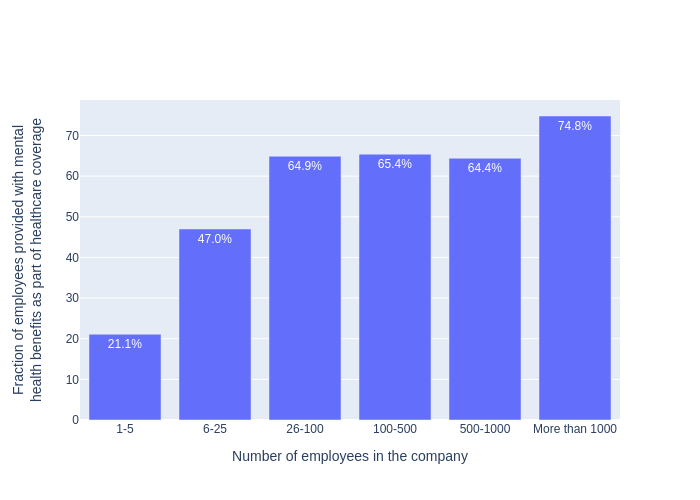

In [50]:
mh_cov_per=[0 for i in range(6)]
mh_cov_per[0]=round(mh_cov[0]/tot_emp[0]*100,1)
mh_cov_per[1]=round(mh_cov[1]/tot_emp[1]*100,1)
mh_cov_per[2]=round(mh_cov[2]/tot_emp[2]*100,1)
mh_cov_per[3]=round(mh_cov[3]/tot_emp[3]*100,1)
mh_cov_per[4]=round(mh_cov[4]/tot_emp[4]*100,1)
mh_cov_per[5]=round(mh_cov[5]/tot_emp[5]*100,1)
import plotly.graph_objects as go
emp_cnt = ['1-5', '6-25', '26-100','100-500', '500-1000', 'More than 1000' ]
fig = go.Figure()
fig.add_trace(go.Bar(x=emp_cnt, y=mh_cov_per,text=[str(x)+"%" for x in mh_cov_per]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Number of employees in the company', yaxis_title='Fraction of employees provided with mental<br>health benefits as part of healthcare coverage')
fig.show("png")

Employees’ awareness of mental health care options available under their employer-
provided coverage

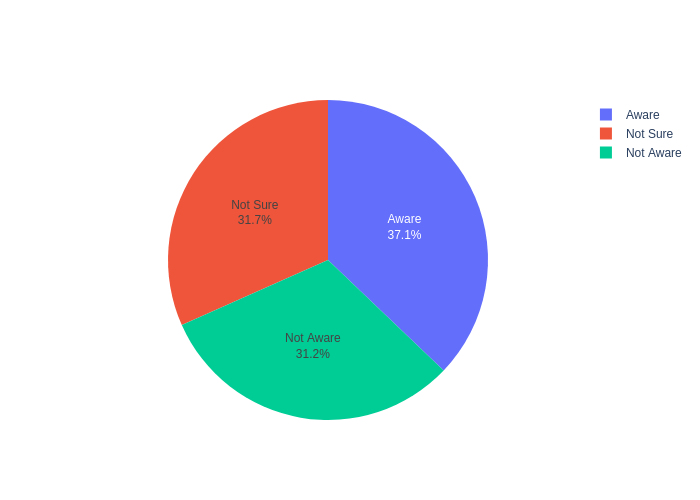

In [51]:
awareness = ['Not Sure', 'Not Aware','Aware']
aware_values=[]
labels = list(set(df['Awareness_of_options_under_coverage'].values))
for i in labels:
    new=df[df.Awareness_of_options_under_coverage==i]
    aware_values.append(new.shape[0])
fig = go.Figure(data=[go.Pie(labels=labels, values=aware_values)])
fig.update_traces(labels=awareness,textinfo='percent+label')
fig.show("png")



Gender proportions of employees in different regions

In [52]:
df_no_drp['country_live'].replace(to_replace = ['USA','Canada','Brazil','Chile','Colombia','Mexico','Argentina','Guatemala','Costa Rica','Venezuela','Ecuador'], value = "North South and central America", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['New Zealand','Australia','UK','Germany','Netherlands','Sweden','France','Ireland','Switzerland','Finland','Denmark','Bulgaria','Italy','Belgium','Spain','Poland','Austria','Romania','Czech Republic','Norway','Estonia','Bosnia and Herzegovina','Lithuania','Slovakia','Serbia','Greece','Hungary'], value = "Europe and Australia", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['Other','India','Russia','South Africa','Pakistan','Afghanistan','Israel','Japan','Algeria','Taiwan','Bangladesh','Brunei','China','Iran','Vietnam'], value = "Asia and Africa", inplace = True)

<Figure size 1152x360 with 0 Axes>

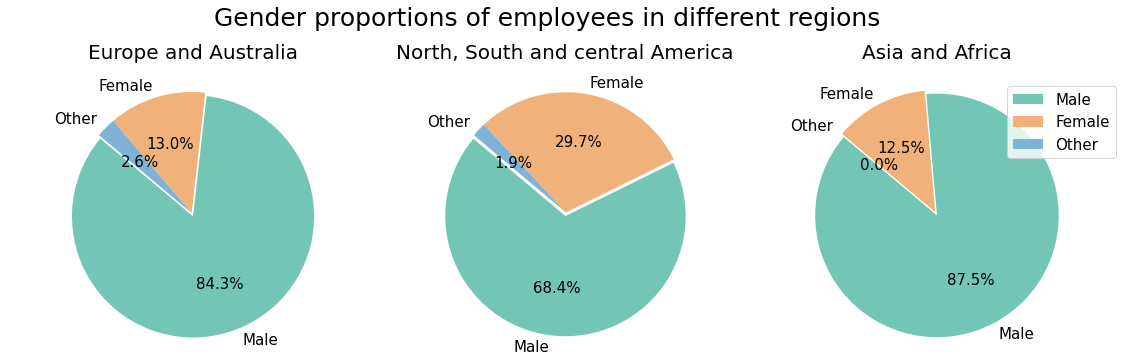

In [53]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 15
plt.figure(figsize = (16,5))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Gender proportions of employees in different regions', fontsize = 25, y=1.08)

#For Eurpoe and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 3.0)]['gender'].count()
labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad = 20, fontsize = 20)


#For America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('North, South and central America', pad = 20, fontsize = 20)

#For Asia Africa and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

legends = ['Male', 'Female', 'Other']
ax3.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad = 20, fontsize = 20)
ax3.legend(labels, loc="best")
plt.savefig('gen_prop.png')

Willingness of employees to share mental illness with friends and family in different
regions

<Figure size 1152x360 with 0 Axes>

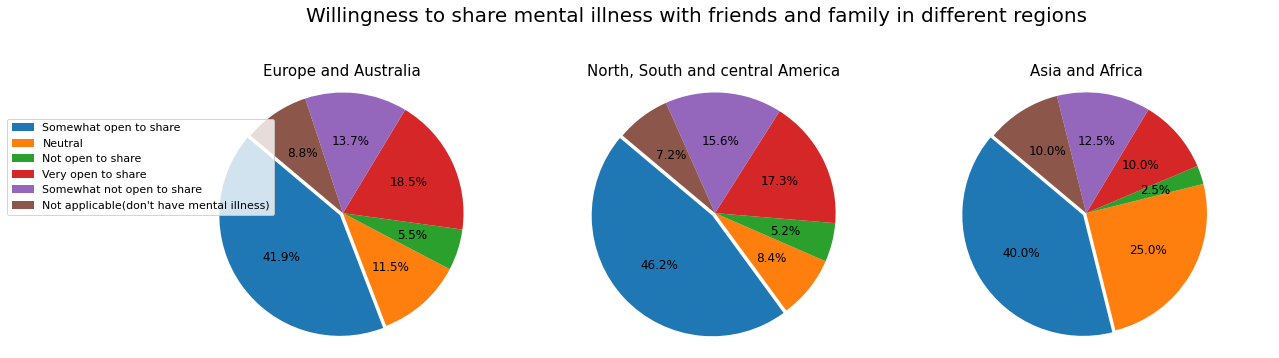

In [54]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =-0)
fig.suptitle('Willingness to share mental illness with friends and family in different regions', fontsize = 20, y=1.08)

#For Eurpoe
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
labels = ['Somewhat open to share','Neutral','Not open to share','Very open to share','Somewhat not open to share',"Not applicable(don't have mental illness)"]
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs,v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad =3, fontsize =15)


#For America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
#labels = ['Somewhat open','Neutral',"Not applicable(don't have mental illness)",'Very open','Not open at all','Somewhat not open']
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax2.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('North, South and central America', pad =3, fontsize =15)

#For Asia Africa and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
#labels = ['Somewhat open','Neutral',"Not applicable(don't have mental illness)",'Very open','Not open at all','Somewhat not open']
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax3.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad =3, fontsize = 15)
ax3.legend(labels=labels, loc=(-2.4,0.5),prop={'size': 11})
plt.savefig('will_share_mh.png')

Fear of negative consequences in male and female employees on discussing mental
health issues with their employers

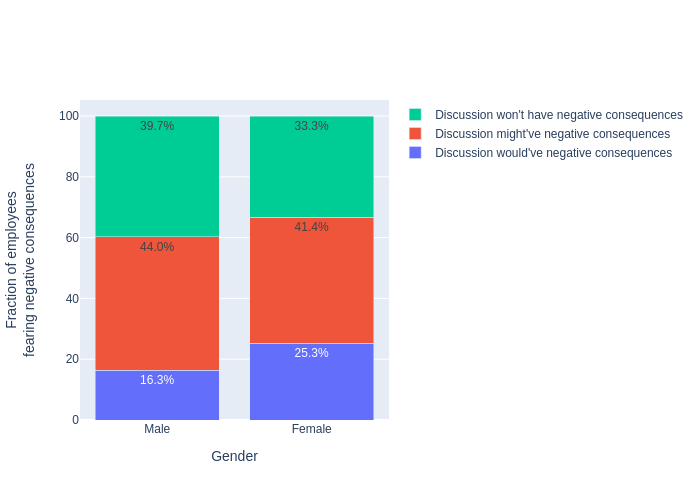

In [55]:
male_neg_cons=[0 for i in range(3)]
female_neg_cons=[0 for i in range(3)]
for i in range(len(df['Discussing_mental_health_neg_consequences'])):
        if(df.iloc[i,9]==0 and df.iloc[i,41]==1): 
            male_neg_cons[0]+=1
        if(df.iloc[i,9]==1 and df.iloc[i,41]==1): 
            male_neg_cons[1]+=1
        if(df.iloc[i,9]==2 and df.iloc[i,41]==1): 
            male_neg_cons[2]+=1
        if(df.iloc[i,9]==0 and df.iloc[i,41]==2): 
            female_neg_cons[0]+=1
        if(df.iloc[i,9]==1 and df.iloc[i,41]==2): 
            female_neg_cons[1]+=1
        if(df.iloc[i,9]==2 and df.iloc[i,41]==2): 
            female_neg_cons[2]+=1  
neg_cons_male_sum=sum(male_neg_cons)
neg_cons_fem_sum=sum(female_neg_cons)

# cal %
for i in range(3):
  male_neg_cons[i]=round((male_neg_cons[i]/neg_cons_male_sum)*100,1)
  female_neg_cons[i]=round((female_neg_cons[i]/neg_cons_fem_sum)*100,1)
# print(male_neg_cons)
# print(female_neg_cons)
neg_con=np.array([male_neg_cons,female_neg_cons]).T
neg_cons_list=neg_con.tolist()
import plotly.graph_objects as go
x = ['Male', 'Female']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=neg_cons_list[0], name="Discussion would've negative consequences",text=[str(x)+"%" for x in neg_cons_list[0]]))
fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name="Discussion might've negative consequences",text=[str(x)+"%"  for x in neg_cons_list[1]]))
fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name="Discussion won't have negative consequences",text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(barmode='stack', xaxis_title='Gender', yaxis_title='Fraction of employees<br>fearing negative consequences')
fig.show("png")

Effect of formal discussion of mental health by employers on the employees’
comfortableness in discussing mental health issues with their supervisors

<Figure size 1152x360 with 0 Axes>

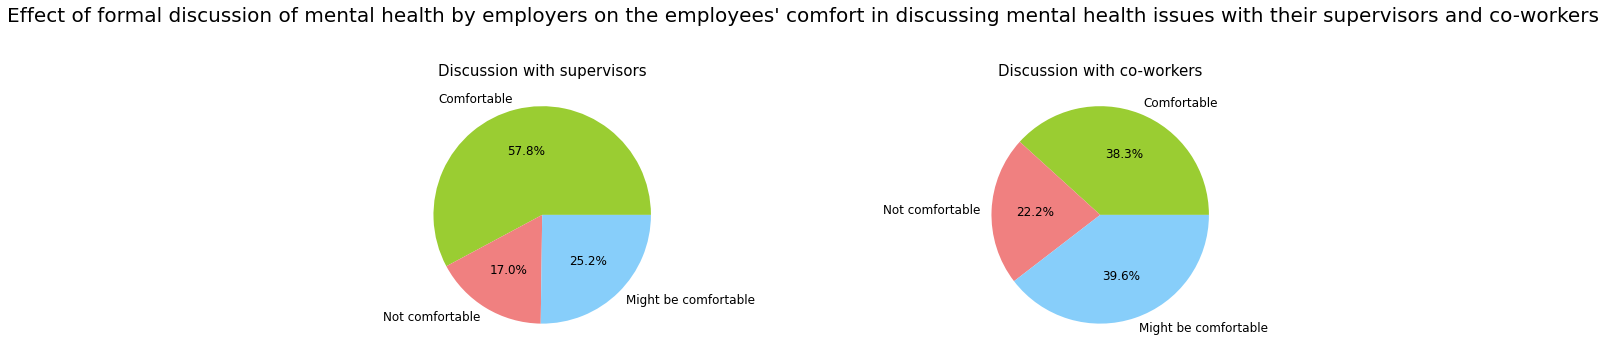

In [56]:
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =0)
fig.suptitle("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors and co-workers", fontsize = 20, y=1.08)

#comfort with supervisor
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_supervisor'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax1.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax1.set_title('Discussion with supervisors', pad =3, fontsize = 15)
#plt.title('Fraction of employees')

#comfort with co-workers
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_coworkers'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Yes')]['Comfort_discussing_with_coworkers'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'No')]['Comfort_discussing_with_coworkers'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Maybe')]['Comfort_discussing_with_coworkers'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax2.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax2.set_title('Discussion with co-workers', pad =3, fontsize = 15)

plt.savefig('disc_eff_comf.png')

In [57]:
#MODELS

In [58]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
X = df.drop('diagnosed_prof', axis = 1)
Y = df['diagnosed_prof']

In [60]:
X.shape

(657, 47)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify = Y,test_size = 0.3,random_state = 2222)

In [62]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

KNN

In [63]:
K = [] 
training = [] 
test = [] 
scores = {}
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
for k in range(2, 25): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, Y_train) 
  
    training_score = clf.score(X_train, Y_train) 
    test_score = clf.score(X_test, Y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [64]:
for keys, values in scores.items(): 
    print(keys, ':', values)

2 : [0.8976034858387799, 0.8080808080808081]
3 : [0.9193899782135077, 0.8888888888888888]
4 : [0.9172113289760349, 0.8838383838383839]
5 : [0.8997821350762527, 0.8838383838383839]
6 : [0.8888888888888888, 0.8888888888888888]
7 : [0.8867102396514162, 0.8838383838383839]
8 : [0.8888888888888888, 0.898989898989899]
9 : [0.8736383442265795, 0.8888888888888888]
10 : [0.8736383442265795, 0.8939393939393939]
11 : [0.8736383442265795, 0.8838383838383839]
12 : [0.8801742919389978, 0.8939393939393939]
13 : [0.8758169934640523, 0.8787878787878788]
14 : [0.8714596949891068, 0.8838383838383839]
15 : [0.8779956427015251, 0.8686868686868687]
16 : [0.8714596949891068, 0.8838383838383839]
17 : [0.869281045751634, 0.8939393939393939]
18 : [0.8714596949891068, 0.8939393939393939]
19 : [0.8714596949891068, 0.8939393939393939]
20 : [0.8714596949891068, 0.898989898989899]
21 : [0.869281045751634, 0.898989898989899]
22 : [0.8758169934640523, 0.8939393939393939]
23 : [0.869281045751634, 0.8838383838383839]
24

Mean Absolute Error: 0.10101010101010101
Mean Squared Error: 0.10101010101010101
Root Mean Squared Error: 0.3178208630818641
accuracy =  89.8989898989899
p =  0.924812030075188
r =  0.8823529411764706
f1 =  0.8926829268292682
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        85
           1       0.85      1.00      0.92       113

    accuracy                           0.90       198
   macro avg       0.92      0.88      0.89       198
weighted avg       0.91      0.90      0.90       198



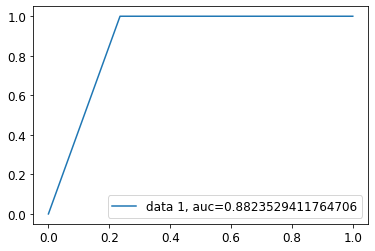

In [65]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_knn)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_knn=accuracy_score(Y_test, Y_pred_knn)
f1_knn=f1_score(Y_test, Y_pred_knn, average="macro")
p_knn=precision_score(Y_test, Y_pred_knn, average="macro")
r_knn=recall_score(Y_test, Y_pred_knn, average="macro")
print("accuracy = ",100*accuracy_knn)
print("p = ",p_knn)
print("r = ",r_knn)
print("f1 = ",f1_knn)
print(classification_report(Y_test, Y_pred_knn))
# Plot ROC curve
fpr_knn, tpr_knn, _ = metrics.roc_curve(Y_test,  Y_pred_knn)
auc_knn = metrics.roc_auc_score(Y_test,  Y_pred_knn)
plt.plot(fpr_knn,tpr_knn,label="data 1, auc="+str(auc_knn))
plt.legend(loc=4)
plt.show()

Logistic Regression

Mean Absolute Error: 0.08585858585858586
Mean Squared Error: 0.08585858585858586
Root Mean Squared Error: 0.2930163576638442
accuracy =  91.41414141414141
p =  0.9265873015873016
r =  0.902915148360229
f1 =  0.9102950190549797
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        85
           1       0.88      0.98      0.93       113

    accuracy                           0.91       198
   macro avg       0.93      0.90      0.91       198
weighted avg       0.92      0.91      0.91       198



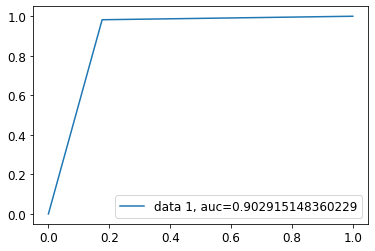

In [66]:
logreg.fit(X_train,Y_train)
Y_pred_lg = logreg.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(Y_test, Y_pred_lg)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_lg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_lg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lg)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_lg=accuracy_score(Y_test, Y_pred_lg)
f1_lg=f1_score(Y_test, Y_pred_lg, average="macro")
p_lg=precision_score(Y_test, Y_pred_lg, average="macro")
r_lg=recall_score(Y_test, Y_pred_lg, average="macro")
print("accuracy = ",100*accuracy_lg)
print("p = ",p_lg)
print("r = ",r_lg)
print("f1 = ",f1_lg)
print(classification_report(Y_test, Y_pred_lg))
# Plot ROC curve
fpr_lg, tpr_lg, _ = metrics.roc_curve(Y_test,  Y_pred_lg)
auc_lg = metrics.roc_auc_score(Y_test,  Y_pred_lg)
plt.plot(fpr_lg,tpr_lg,label="data 1, auc="+str(auc_lg))
plt.legend(loc=4)
plt.show()

Decision trees

Mean Absolute Error: 0.14646464646464646
Mean Squared Error: 0.14646464646464646
Root Mean Squared Error: 0.38270699819136633
accuracy =  85.35353535353535
p =  0.8611111111111112
r =  0.8410723581467985
f1 =  0.8469738560349651
              precision    recall  f1-score   support

           0       0.89      0.75      0.82        85
           1       0.83      0.93      0.88       113

    accuracy                           0.85       198
   macro avg       0.86      0.84      0.85       198
weighted avg       0.86      0.85      0.85       198



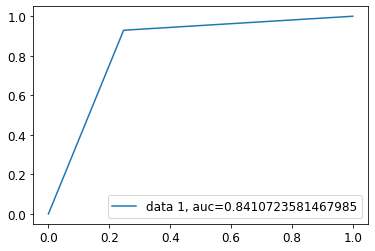

In [67]:
tree.fit(X_train,Y_train)
Y_pred_tree = tree.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(Y_test, Y_pred_tree)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_tree)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_tree=accuracy_score(Y_test, Y_pred_tree)
f1_tree=f1_score(Y_test, Y_pred_tree, average="macro")
p_tree=precision_score(Y_test, Y_pred_tree, average="macro")
r_tree=recall_score(Y_test, Y_pred_tree, average="macro")
print("accuracy = ",100*accuracy_tree)
print("p = ",p_tree)
print("r = ",r_tree)
print("f1 = ",f1_tree)
print(classification_report(Y_test, Y_pred_tree))
# Plot ROC curve
fpr_tree, tpr_tree, _ = metrics.roc_curve(Y_test,  Y_pred_tree)
auc_tree = metrics.roc_auc_score(Y_test,  Y_pred_tree)
plt.plot(fpr_tree,tpr_tree,label="data 1, auc="+str(auc_tree))
plt.legend(loc=4)
plt.show()

RANDOM FOREST

In [68]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=2222)

In [69]:
Y_pred = rf.predict(X_test)

In [70]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [71]:
cm

array([[ 68,  17],
       [  0, 113]])

In [72]:
#evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.08585858585858586
Mean Squared Error: 0.08585858585858586
Root Mean Squared Error: 0.2930163576638442


In [73]:
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy=accuracy_score(Y_test, Y_pred)
f1=f1_score(Y_test, Y_pred, average="macro")
p=precision_score(Y_test, Y_pred, average="macro")
r=recall_score(Y_test, Y_pred, average="macro")
print("accuracy = ",100*accuracy)
print("p = ",p)
print("r = ",r)
print("f1 = ",f1)
print(classification_report(Y_test, Y_pred))

accuracy =  91.41414141414141
p =  0.9346153846153846
r =  0.9
f1 =  0.9094650205761317
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        85
           1       0.87      1.00      0.93       113

    accuracy                           0.91       198
   macro avg       0.93      0.90      0.91       198
weighted avg       0.93      0.91      0.91       198



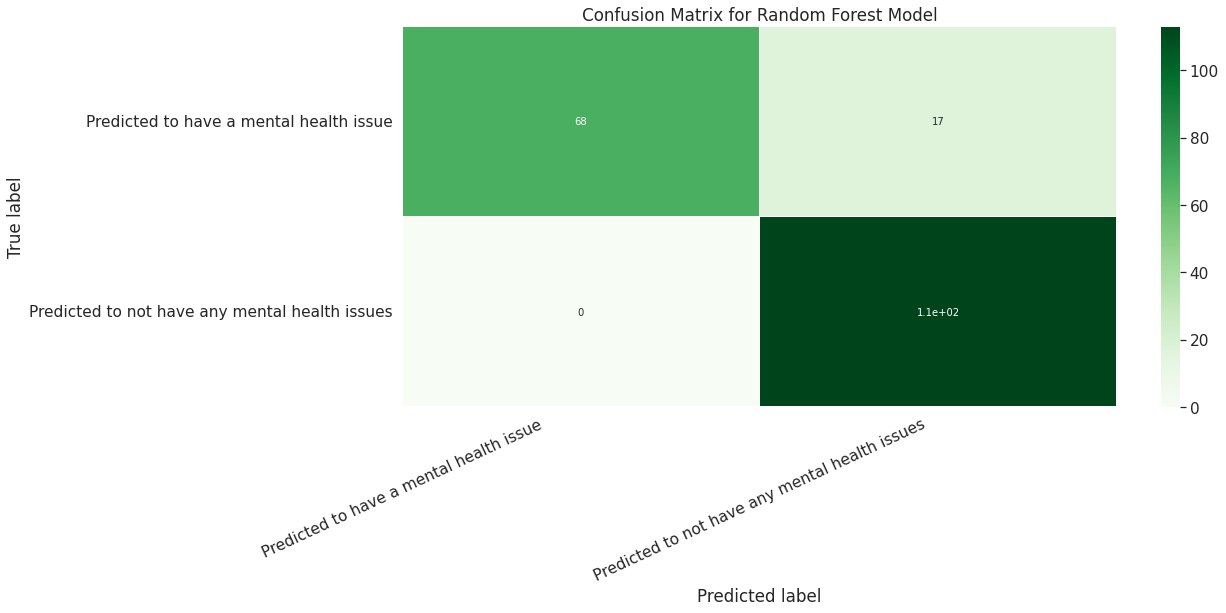

In [74]:
# Build the plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Predicted to have a mental health issue', 'Predicted to not have any mental health issues']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

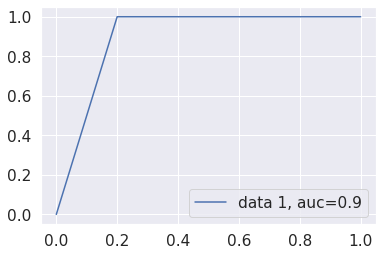

In [75]:
# Plot ROC curve
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred)
auc = metrics.roc_auc_score(Y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


ADABOOST

In [76]:
ada.fit(X_train,Y_train)
Y_pred_ada = ada.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(Y_test, Y_pred_ada)
cm_ada

array([[ 74,  11],
       [ 12, 101]])

In [77]:
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_ada))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_ada))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ada)))

Mean Absolute Error: 0.11616161616161616
Mean Squared Error: 0.11616161616161616
Root Mean Squared Error: 0.3408249054303634


In [78]:
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_ada=accuracy_score(Y_test, Y_pred_ada)
f1_ada=f1_score(Y_test, Y_pred_ada, average="macro")
p_ada=precision_score(Y_test, Y_pred_ada, average="macro")
r_ada=recall_score(Y_test, Y_pred_ada, average="macro")
print("accuracy = ",100*accuracy_ada)
print("p = ",p_ada)
print("r = ",r_ada)
print("f1 = ",f1_ada)
print(classification_report(Y_test, Y_pred_ada))

accuracy =  88.38383838383838
p =  0.881125415282392
r =  0.8821967725143154
f1 =  0.8816374269005848
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        85
           1       0.90      0.89      0.90       113

    accuracy                           0.88       198
   macro avg       0.88      0.88      0.88       198
weighted avg       0.88      0.88      0.88       198



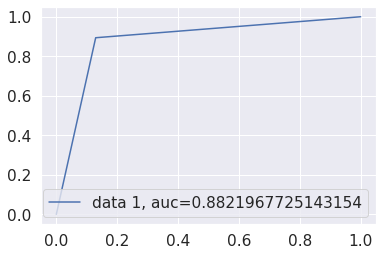

In [79]:
# Plot ROC curve
fpr_ada, tpr_ada, _ = metrics.roc_curve(Y_test,  Y_pred_ada)
auc_ada = metrics.roc_auc_score(Y_test,  Y_pred_ada)
plt.plot(fpr_ada,tpr_ada,label="data 1, auc="+str(auc_ada))
plt.legend(loc=4)
plt.show()


XGBOOST

Mean Absolute Error: 0.06565656565656566
Mean Squared Error: 0.06565656565656566
Root Mean Squared Error: 0.25623537159526916
accuracy =  93.43434343434343
p =  0.9448561464690497
r =  0.9249869859448203
f1 =  0.9316933365177932
              precision    recall  f1-score   support

           0       0.99      0.86      0.92        85
           1       0.90      0.99      0.95       113

    accuracy                           0.93       198
   macro avg       0.94      0.92      0.93       198
weighted avg       0.94      0.93      0.93       198



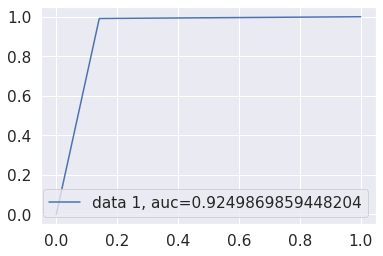

In [80]:
xgboost.fit(X_train,Y_train)
Y_pred_xg = xgboost.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_xg = confusion_matrix(Y_test, Y_pred_xg)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_xg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_xg)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_xg=accuracy_score(Y_test, Y_pred_xg)
f1_xg=f1_score(Y_test, Y_pred_xg, average="macro")
p_xg=precision_score(Y_test, Y_pred_xg, average="macro")
r_xg=recall_score(Y_test, Y_pred_xg, average="macro")
print("accuracy = ",100*accuracy_xg)
print("p = ",p_xg)
print("r = ",r_xg)
print("f1 = ",f1_xg)
print(classification_report(Y_test, Y_pred_xg))
# Plot ROC curve
fpr_xg, tpr_xg, _ = metrics.roc_curve(Y_test,  Y_pred_xg)
auc_xg = metrics.roc_auc_score(Y_test,  Y_pred_xg)
plt.plot(fpr_xg,tpr_xg,label="data 1, auc="+str(auc_xg))
plt.legend(loc=4)
plt.show()

GRADIENT BOOSTING CLASSIFIER

Mean Absolute Error: 0.06060606060606061
Mean Squared Error: 0.06060606060606061
Root Mean Squared Error: 0.24618298195866548
accuracy =  93.93939393939394
p =  0.9486178861788618
r =  0.9308693388859969
f1 =  0.9370762711864407
              precision    recall  f1-score   support

           0       0.99      0.87      0.93        85
           1       0.91      0.99      0.95       113

    accuracy                           0.94       198
   macro avg       0.95      0.93      0.94       198
weighted avg       0.94      0.94      0.94       198



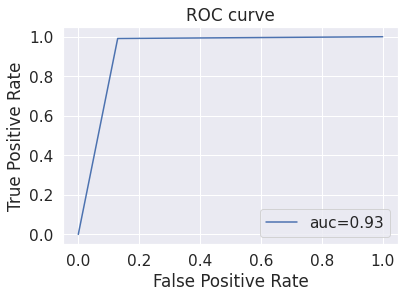

In [81]:
grad.fit(X_train,Y_train)
Y_pred_grad = grad.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_grad = confusion_matrix(Y_test, Y_pred_grad)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_grad))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_grad))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_grad)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_grad=accuracy_score(Y_test, Y_pred_grad)
f1_grad=f1_score(Y_test, Y_pred_grad, average="macro")
p_grad=precision_score(Y_test, Y_pred_grad, average="macro")
r_grad=recall_score(Y_test, Y_pred_grad, average="macro")
print("accuracy = ",100*accuracy_grad)
print("p = ",p_grad)
print("r = ",r_grad)
print("f1 = ",f1_grad)
print(classification_report(Y_test, Y_pred_grad))
# Plot ROC curve
fpr_grad, tpr_grad, _ = metrics.roc_curve(Y_test,  Y_pred_grad)
auc_grad = metrics.roc_auc_score(Y_test,  Y_pred_grad)
plt.plot(fpr_grad,tpr_grad,label="auc="+str(round(auc_grad,2)))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('grad_boost_roc.png')
plt.show()


K FOLD CROSS VALIDATION

In [82]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

In [83]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import StratifiedKFold
# rf = RandomForestClassifier(random_state = 2222)
# logreg = LogisticRegression()
# tree = DecisionTreeClassifier(random_state = 2222)
# knn = KNeighborsClassifier()
# ada = AdaBoostClassifier(random_state = 2222)
# grad = GradientBoostingClassifier(random_state = 2222)
# xgboost = XGBClassifier(random_state = 2222)

#kf=KFold(n_splits=10)
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
#logreg_score=cross_val_score(logreg,X,Y,cv=kf)
logreg_score = cross_val_score(logreg, X_train, Y_train, cv = kf)
print("Cross Validation Scores are {}".format(logreg_score))
print("Average Cross Validation score :{}+/- {}".format(logreg_score.mean()*100,logreg_score.std()*100))

Cross Validation Scores are [0.81818182 0.84848485 0.84848485 0.87878788 0.84848485 0.81818182
 0.90909091 0.93939394 0.81818182 0.90909091 0.81818182 0.9375
 0.875      0.90625   ]
Average Cross Validation score :86.9521103896104+/- 4.30699155912631


In [84]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
rf_score=cross_val_score(rf,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(rf_score))
print("Average Cross Validation score :{}".format(rf_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(rf_score.mean()*100,rf_score.std()*100))

Cross Validation Scores are [0.81818182 0.87878788 0.84848485 0.93939394 0.90909091 0.87878788
 0.90909091 0.93939394 0.87878788 0.87878788 0.87878788 0.90625
 0.84375    0.9375    ]
Average Cross Validation score :0.8889339826839827
Average Cross Validation score :88.89339826839827+/- 3.561884630767643


In [85]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
tree_score=cross_val_score(tree,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(tree_score))
print("Average Cross Validation score :{}".format(tree_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(tree_score.mean()*100,tree_score.std()*100))

Cross Validation Scores are [0.75757576 0.87878788 0.78787879 0.87878788 0.84848485 0.84848485
 0.84848485 0.78787879 0.90909091 0.84848485 0.87878788 0.8125
 0.8125     0.96875   ]
Average Cross Validation score :0.8476055194805194
Average Cross Validation score :84.76055194805194+/- 5.283482869827194


In [86]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
knn_score=cross_val_score(knn,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(knn_score))
print("Average Cross Validation score :{}+/- {}".format(knn_score.mean()*100,knn_score.std()*100))

Cross Validation Scores are [0.87878788 0.87878788 0.78787879 0.87878788 0.84848485 0.72727273
 0.93939394 0.90909091 0.87878788 0.84848485 0.81818182 0.78125
 0.875      0.90625   ]
Average Cross Validation score :85.40313852813853+/- 5.5435994228149434


In [87]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
ada_score=cross_val_score(ada,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(ada_score))
print("Average Cross Validation score :{}+/- {}".format(ada_score.mean()*100,ada_score.std()*100))

Cross Validation Scores are [0.84848485 0.87878788 0.75757576 0.84848485 0.81818182 0.78787879
 0.90909091 0.93939394 0.84848485 0.84848485 0.84848485 0.90625
 0.90625    0.90625   ]
Average Cross Validation score :86.08630952380952+/- 4.897302928757536


In [88]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
grad_score=cross_val_score(grad,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(grad_score))
print("Average Cross Validation score :{}+/- {}".format(grad_score.mean()*100,grad_score.std()*100))

Cross Validation Scores are [0.90909091 0.87878788 0.84848485 0.93939394 0.87878788 0.81818182
 0.90909091 0.90909091 0.87878788 0.87878788 0.87878788 0.90625
 0.875      0.9375    ]
Average Cross Validation score :88.90016233766235+/- 3.1366980991876807


In [89]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
xgboost_score=cross_val_score(xgboost,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(xgboost_score))
print("Average Cross Validation score :{}+/- {}".format(xgboost_score.mean()*100,xgboost_score.std()*100))

Cross Validation Scores are [0.84848485 0.87878788 0.84848485 0.90909091 0.87878788 0.78787879
 0.93939394 0.90909091 0.87878788 0.87878788 0.84848485 0.9375
 0.84375    0.9375    ]
Average Cross Validation score :88.03436147186147+/- 4.1932701630312925


**CLUSTERING**

In [90]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

KMEANS CLUSTERING

Sum of sqaured errors SSE:  34547.072279742686
Silhouette score: 0.22123286750631804
calinski_harabasz_score: 334.545
1.4175714279274914


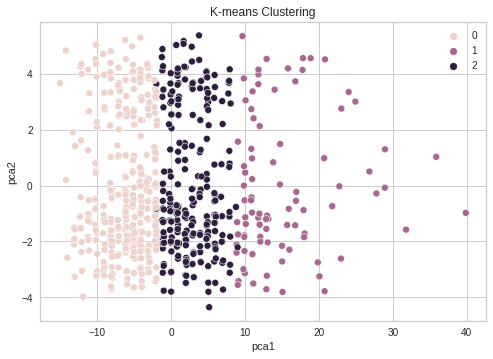

In [91]:
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(df)
kmeans_labels3 = kmeans3.labels_
sse= kmeans3.inertia_
score1 = silhouette_score(df, kmeans_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmeans_labels3)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmeans_labels3))
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=kmeans_labels3, data=results)
plt.title('K-means Clustering')
plt.savefig('kmeans.png')
plt.show()


KMEANS++

Sum of sqaured errors SSE:  34542.75418403534
Silhouette score: 0.22579112477086102
calinski_harabasz_score: 334.627
1.3940439654776338


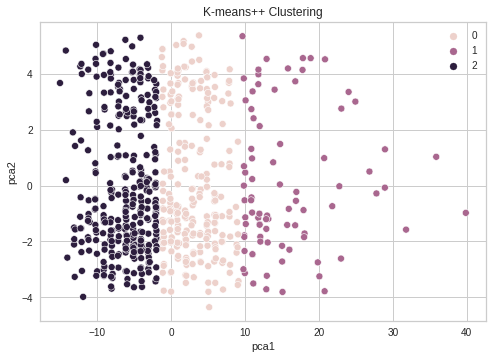

In [92]:
km_plus3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000).fit(df)
# we store the cluster labels
kmplus_labels3 = km_plus3.labels_
sse= km_plus3.inertia_
score1 = silhouette_score(df, kmplus_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmplus_labels3)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmplus_labels3))
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

sns.scatterplot(x="pca1", y="pca2", hue=kmplus_labels3, data=results)
plt.title('K-means++ Clustering')
plt.savefig('kmeans++.png')
plt.show()


In [93]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn_extra-0.2.0-cp37-cp37m-manylinux2010_x86_64.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.3 MB/s eta 0:00:00


K-MEDOIDS/ PAM

In [94]:
from sklearn_extra.cluster import KMedoids
kmedoids_euc_3 = KMedoids(n_clusters=3, metric='euclidean', method='pam', init='k-medoids++', max_iter=300, random_state=None)
kmedoids_euc_3.fit(df)
kmedoids_euc_labels3 = kmedoids_euc_3.labels_

#sse= gmm_model2.inertia_
score1 = silhouette_score(df, kmedoids_euc_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmedoids_euc_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, kmedoids_euc_labels3))


Silhouette score: 0.19386285181163332
calinski_harabasz_score: 321.473
davies_bouldin_score : 1.5271732826724975


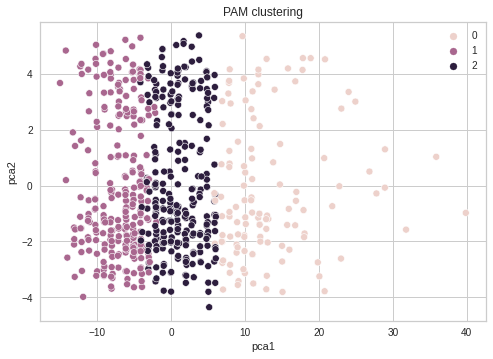

In [95]:
sns.scatterplot(x="pca1", y="pca2", hue=kmedoids_euc_labels3, data=results)
plt.title('PAM clustering')
plt.savefig('pam.png')
plt.show()


AGGLOMORATIVE HEIRARCHY CLUSTERING

Silhouette score: 0.21045042676278208
calinski_harabasz_score: 321.727
davies_bouldin_score : 1.439304293459099


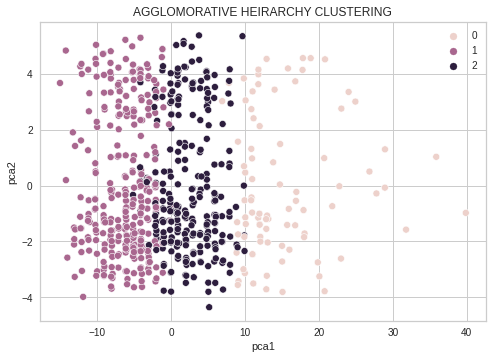

In [96]:
from sklearn.cluster import AgglomerativeClustering

# define the model
agglomerative_model = AgglomerativeClustering(n_clusters=3)

# assign each data point to a cluster
agglomerative_model.fit(df)

agg_lables=agglomerative_model.labels_
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, agg_lables, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, agg_lables)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, agg_lables))
sns.scatterplot(x="pca1", y="pca2", hue=agg_lables, data=results)
plt.title('AGGLOMORATIVE HEIRARCHY CLUSTERING')
plt.savefig('agg.png')
plt.show()


GAUSSIAN MIXTURE MODELS

Silhouette score: 0.04828016927780209
calinski_harabasz_score: 139.775
davies_bouldin_score : 2.735281999797826


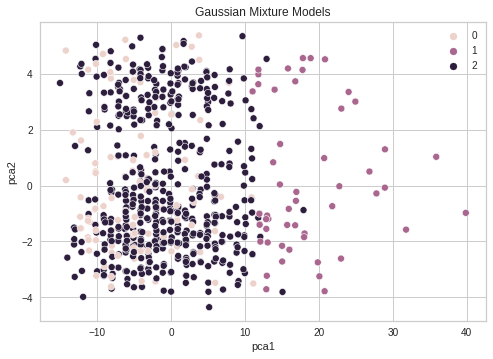

In [97]:
# we store the cluster labels
gmm_model3 = GaussianMixture(n_components=3)
gmm_model3.fit(df)
gmm_labels3=gmm_model3.predict(df)
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, gmm_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, gmm_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, gmm_labels3))
sns.scatterplot(x="pca1", y="pca2", hue=gmm_labels3, data=results)
plt.title('Gaussian Mixture Models')
plt.savefig('gmm.png')
plt.show()


SPECTRAL CLUSTERING

Silhouette score: 0.24392484447770427
calinski_harabasz_score: 316.759
davies_bouldin_score : 1.2524943452059827


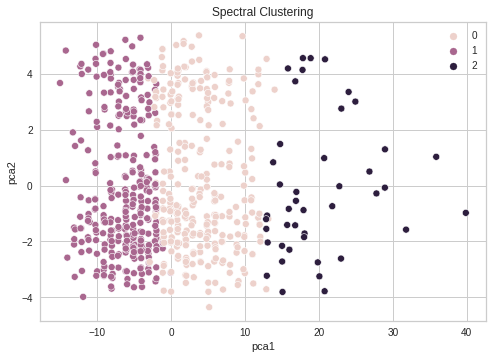

In [98]:
from sklearn.cluster import SpectralClustering
spectral_cluster_model3= SpectralClustering(
    n_clusters=3, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)
spectral_cluster_model3.fit(df)
sc_labels3=spectral_cluster_model3.labels_
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, sc_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, sc_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, sc_labels3))
sns.scatterplot(x="pca1", y="pca2", hue=sc_labels3, data=results)
plt.title('Spectral Clustering')
plt.savefig('spc.png')
plt.show()


BIRCH

Silhouette score: 0.20894241761618368
calinski_harabasz_score: 324.456
davies_bouldin_score : 1.4541359811617383


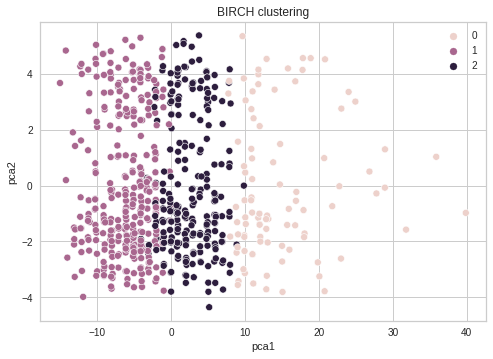

In [99]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import Birch


# define the model
birch_model = Birch(threshold=0.03, n_clusters=3)

# train the model
birch_model.fit(df)
birch_labels3=birch_model.labels_
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, birch_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, birch_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, birch_labels3))
sns.scatterplot(x="pca1", y="pca2", hue=birch_labels3, data=results)
plt.title('BIRCH clustering')
plt.savefig('birch.png')
plt.show()

# # assign each data point to a cluster
# birch_result = birch_model.predict(df)

# # get all of the unique clusters
# birch_clusters = unique(birch_result)

# # plot the BIRCH clusters
# for birch_cluster in birch_clusters:
#     # get data points that fall in this cluster
#     index = where(birch_result == birch_clusters)
#     # make the plot
#     pyplot.scatter(training_data[index, 0], training_data[index, 1])

# # show the BIRCH plot
# pyplot.show()


RISK SCORE CALCULATION

In [100]:
#Calculating risk scores for each cluster using the classifications for curr_mh and diagnosed_prof
#we make 3 different clusters
#sc_labels3
#kmplus_labels3
cluster1 = [x[0] for x, value in np.ndenumerate(sc_labels3) if value==0]
cluster2=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==1]
cluster3=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==2]
cluster1_risk=0
total_high=0
for i in range(len(cluster1)) :
    diagnosed=df.iloc[cluster1[i], 36]
    curr_mh=df.iloc[cluster1[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster1_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster1_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster1_risk+=0.25
cluster2_risk=0
for i in range(len(cluster2)) : 
    diagnosed=df.iloc[cluster2[i], 36]
    curr_mh=df.iloc[cluster2[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster2_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster2_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster2_risk+=0.25
cluster3_risk=0
for i in range(len(cluster3)) : 
    diagnosed=df.iloc[cluster3[i], 36]
    curr_mh=df.iloc[cluster3[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster3_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster3_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster3_risk+=0.25
#The risks for each cluster are used to identify which cluster is high, low, med
print('cluster1:',cluster1_risk)
print('cluster2:',cluster2_risk)
print('cluster3:',cluster3_risk)
print(cluster1)
print(cluster2)
print(cluster3)

cluster1: 967.5
cluster2: 1102.5
cluster3: 134.5
[0, 2, 4, 5, 7, 9, 12, 15, 16, 17, 18, 19, 20, 22, 23, 26, 27, 29, 32, 33, 34, 35, 36, 37, 39, 41, 42, 47, 48, 50, 55, 56, 57, 59, 60, 61, 62, 64, 65, 66, 68, 70, 72, 73, 74, 75, 76, 77, 79, 83, 84, 87, 88, 89, 92, 94, 95, 96, 97, 98, 102, 103, 107, 108, 110, 116, 120, 125, 126, 129, 130, 135, 136, 137, 139, 146, 149, 150, 154, 155, 156, 158, 160, 161, 164, 167, 168, 169, 172, 174, 176, 177, 179, 180, 182, 185, 188, 192, 194, 195, 197, 198, 201, 204, 205, 209, 212, 217, 219, 220, 225, 227, 229, 233, 234, 237, 239, 240, 241, 242, 246, 248, 253, 256, 258, 261, 264, 265, 269, 274, 276, 277, 281, 282, 284, 286, 289, 290, 293, 295, 296, 303, 308, 313, 316, 320, 321, 322, 325, 326, 328, 331, 332, 333, 335, 337, 338, 339, 341, 345, 348, 352, 353, 354, 357, 359, 360, 362, 366, 368, 370, 371, 378, 379, 380, 382, 383, 384, 386, 389, 390, 391, 394, 396, 397, 398, 399, 406, 410, 411, 412, 413, 414, 415, 416, 420, 422, 423, 432, 433, 434, 436, 439, 4

In [101]:
#Classifying clusters as high, row and medium risks using cluster risks
import sys
cluster_risks=[[cluster1,cluster1_risk],[cluster2,cluster2_risk],[cluster3,cluster3_risk]]
high_risk=0
total=3
low_risk = sys.maxsize
high_risk_index=0
low_risk_index=0
high_risk_class=cluster_risks[0][0]
low_risk_class=cluster_risks[0][0]
for i in range(0,len(cluster_risks)):
    if(high_risk<=cluster_risks[i][1]):
        high_risk_class=cluster_risks[i][0]
        high_risk_index=i
        high_risk=cluster_risks[i][1]
total-=high_risk_index
print(total)
for i in range(0,len(cluster_risks)):
    if(low_risk>=cluster_risks[i][1]):
        low_risk_class=cluster_risks[i][0]
        low_risk_index = i
        low_risk=cluster_risks[i][1]
total = total - low_risk_index
med_risk_class=cluster_risks[total][0]
print(high_risk_class)
print(med_risk_class)
print(low_risk_class) 

2
[1, 3, 6, 8, 11, 13, 14, 21, 24, 25, 28, 30, 31, 38, 40, 43, 44, 45, 46, 49, 51, 52, 54, 58, 63, 67, 69, 71, 78, 80, 81, 82, 86, 90, 91, 93, 99, 101, 104, 105, 106, 109, 111, 112, 113, 114, 115, 118, 119, 121, 122, 123, 124, 127, 128, 131, 132, 133, 134, 138, 140, 141, 142, 143, 144, 145, 147, 152, 157, 159, 162, 163, 166, 170, 171, 173, 175, 178, 181, 183, 184, 186, 187, 189, 190, 191, 193, 196, 199, 200, 202, 203, 206, 207, 208, 210, 213, 214, 215, 216, 218, 221, 222, 223, 224, 226, 228, 230, 231, 232, 235, 236, 244, 245, 247, 250, 251, 252, 254, 255, 257, 259, 260, 262, 263, 266, 268, 270, 271, 272, 273, 275, 278, 279, 280, 283, 285, 287, 291, 292, 294, 297, 299, 300, 301, 302, 304, 305, 306, 307, 310, 311, 314, 315, 317, 318, 319, 323, 327, 329, 330, 336, 342, 344, 346, 347, 349, 350, 351, 355, 361, 363, 364, 365, 367, 369, 372, 373, 374, 375, 376, 377, 381, 385, 387, 388, 392, 395, 400, 401, 402, 403, 404, 407, 409, 417, 419, 421, 424, 425, 426, 427, 428, 429, 430, 431, 435, 437

In [102]:
print(high_risk_index)
print(low_risk_index)

1
2


In [103]:
tot_high_risk=len(high_risk_class)
tot_med_risk=len(med_risk_class)
tot_low_risk=len(low_risk_class)

INFERENCES

In [104]:
#Inferences
#Effect of family history (col no=33)
fam_hist_high=0;
no_fam_hist_high=0;
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],33]==2):
            fam_hist_high+=1
        if(df.iloc[high_risk_class[i],33]==0):
            no_fam_hist_high+=1

fam_hist_med=0;
no_fam_hist_med=0
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],33]==2):
            fam_hist_med+=1
        if(df.iloc[med_risk_class[i],33]==0):
            no_fam_hist_med+=1
            
fam_hist_low=0;
no_fam_hist_low=0
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],33]==2):
            fam_hist_low+=1
        if(df.iloc[low_risk_class[i],33]==0):
            no_fam_hist_low+=1
# print(fam_hist_high)
# print(fam_hist_med)
# print(fam_hist_low)
# print(no_fam_hist_high)
# print(no_fam_hist_med)
# print(no_fam_hist_low)

Number of employees in each risk-cluster with a family history of mental illness

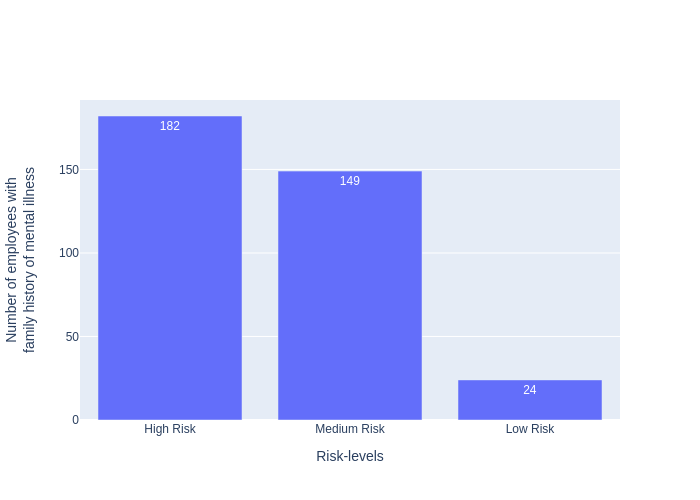

In [105]:
import plotly.graph_objects as go
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[fam_hist_high, fam_hist_med, fam_hist_low]
fig = go.Figure(data=[go.Bar(name='Family history', x=risks, y=level,text=[str(x) for x in level])])
# Change the bar mode

fig.update_layout(xaxis_title='Risk-levels', yaxis_title='Number of employees with<br>family history of mental illness')
fig.show("png")

In [ ]:
# print(len(high_risk_class))
# print(len(med_risk_class))
# print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :
        l.append(df.iloc[high_risk_class[i],34])
from collections import Counter
past_mh_high=Counter(l)[2]
# print(Counter(l)[0])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(low_risk_class)) :

        l.append(df.iloc[low_risk_class[i],31])
from collections import Counter
past_mh_low=Counter(l)[2]
# print(Counter(l)[0])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(med_risk_class)) :
        l.append(df.iloc[med_risk_class[i],31])
        
from collections import Counter
past_mh_med=Counter(l)[2]
# print(Counter(l)[0])
# print(Counter(l)[1])
# print(Counter(l)[2])

Fraction of employees with a past mental health disorder in each risk-cluster

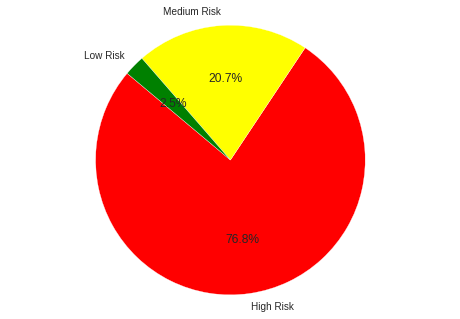

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [past_mh_high, past_mh_med, past_mh_low]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.savefig("past_mh_disorder_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

Fraction of employees belonging to different age groups in each risk-cluster


In [107]:
tot_age_18_25=0
tot_age_26_45=0
tot_age_46_65=0
tot_age_66_75=0

age_18_25_high=0
age_18_25_med=0
age_18_25_low=0

age_26_45_high=0
age_26_45_med=0
age_26_45_low=0

age_46_65_high=0
age_46_65_med=0
age_46_65_low=0

age_66_75_high=0
age_66_75_med=0
age_66_75_low=0
for i in range(len(high_risk_class)) :
        if(df.iloc[high_risk_class[i],40]>=18 and df.iloc[high_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_high+=1
        elif(df.iloc[high_risk_class[i],40]>=26 and df.iloc[high_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_high+=1
        elif(df.iloc[high_risk_class[i],40]>=46 and df.iloc[high_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_high+=1
        elif(df.iloc[high_risk_class[i],40]>=66 and df.iloc[high_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_high+=1
for i in range(len(med_risk_class)) :
        if(df.iloc[med_risk_class[i],40]>=18 and df.iloc[med_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_med+=1
        elif(df.iloc[med_risk_class[i],40]>=26 and df.iloc[med_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_med+=1
        elif(df.iloc[med_risk_class[i],40]>=46 and df.iloc[med_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_med+=1
        elif(df.iloc[med_risk_class[i],40]>=66 and df.iloc[med_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_med+=1
for i in range(len(low_risk_class)) :
        if(df.iloc[low_risk_class[i],40]>=18 and df.iloc[low_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_low+=1
        elif(df.iloc[low_risk_class[i],40]>=26 and df.iloc[low_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_low+=1
        elif(df.iloc[low_risk_class[i],40]>=46 and df.iloc[low_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_low+=1
        elif(df.iloc[low_risk_class[i],40]>=66 and df.iloc[low_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_low+=1


In [108]:
age_high = [age_18_25_high/tot_age_18_25,age_26_45_high/tot_age_26_45, age_46_65_high/tot_age_46_65, age_66_75_high/tot_age_66_75 ]
age_med = [age_18_25_med/tot_age_18_25, age_26_45_med/tot_age_26_45, age_46_65_med/tot_age_46_65, age_66_75_med/tot_age_66_75 ]
age_low = [age_18_25_low/tot_age_18_25, age_26_45_low/tot_age_26_45, age_46_65_low/tot_age_46_65, age_66_75_low/tot_age_66_75 ]

In [109]:
y1=[round(i*100,2) for i in age_high]
y2=[round(i*100,2) for i in age_med]
y3=[round(i*100,2) for i in age_low]

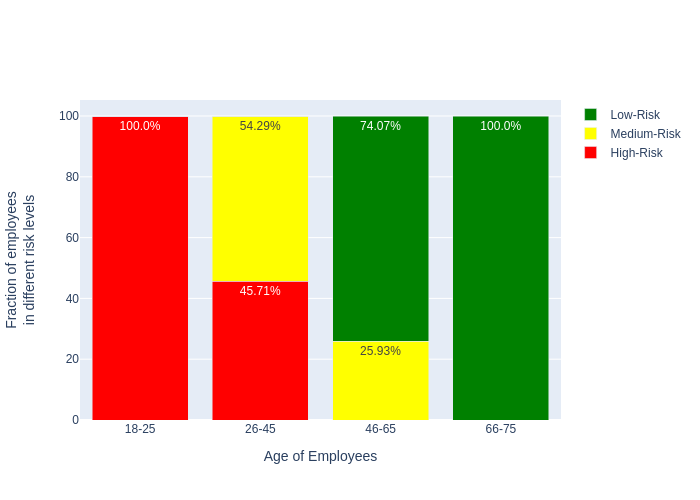

In [110]:
import plotly.graph_objects as go
x =['18-25', '26-45', '46-65', '66-75']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y1, name='High-Risk',text=[str(x)+"%" for x in y1], marker_color='red'))
fig.add_trace(go.Bar(x=x, y=y2,name='Medium-Risk',text=[str(x)+"%"  for x in y2], marker_color='yellow'))
fig.add_trace(go.Bar(x=x, y=y3,name='Low-Risk',text=[str(x)+"%"  for x in y3], marker_color='green'))
fig.update_layout(barmode='stack',  xaxis_title='Age of Employees', yaxis_title='Fraction of employees<br>in different risk levels')
#fig.savefig('rating_tech_supp.jpg')
fig.show("png")

Fraction of female employees in each risk-cluster

In [ ]:
# print(len(high_risk_class))
# print(len(med_risk_class))
# print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :

        l.append(df.iloc[high_risk_class[i],41])
from collections import Counter
fem_high=Counter(l)[2]
# print(Counter(l)[3])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(med_risk_class)) :

        l.append(df.iloc[med_risk_class[i],31])
        
from collections import Counter
fem_med=Counter(l)[2]
# print(Counter(l)[3])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(low_risk_class)) :

        l.append(df.iloc[low_risk_class[i],31])
from collections import Counter
fem_low=Counter(l)[2]
# print(Counter(l)[3])
# print(Counter(l)[1])
# print(Counter(l)[2])

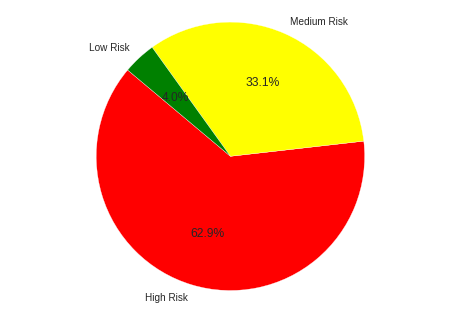

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [fem_high, fem_med, fem_low]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.savefig("female_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

Effect of lack of social support towards mental health by employers

<Figure size 1152x576 with 0 Axes>

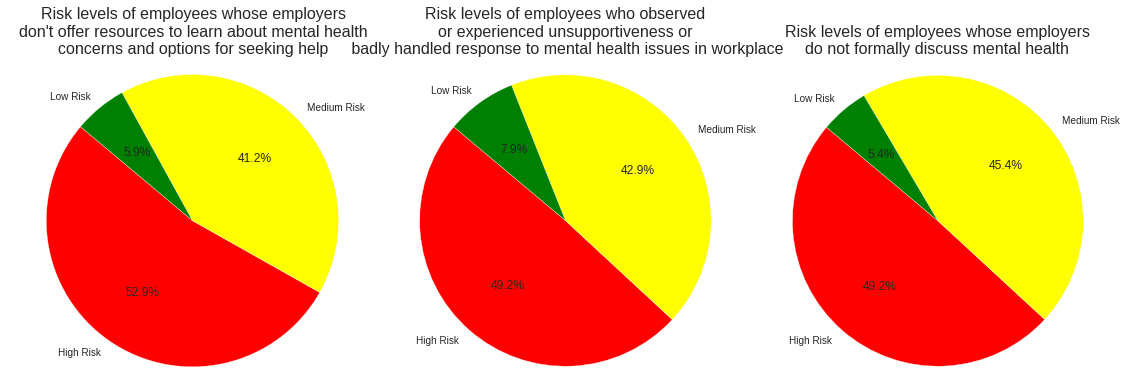

In [ ]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,8))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =-0)
#fig.suptitle('Social support towards mental health by employers', fontsize = 18, y=1.08)

#For Eurpoe
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [126, 98, 14]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax1.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Risk levels of employees whose employers\ndon\'t offer resources to learn about mental health\nconcerns and options for seeking help', pad =3, fontsize =16)


#For America
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [94, 82, 15]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax2.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Risk levels of employees who observed\nor experienced unsupportiveness or\n badly handled response to mental health issues in workplace', pad =3, fontsize =16)

#For Asia Africa and Australia
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [228, 210, 25]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax3.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Risk levels of employees whose employers\ndo not formally discuss mental health', pad =3, fontsize =16)

plt.savefig('social_supp_by_emp.png')

Pre and post covid analysis

Fraction of employers offering their employees resources to learn more about mental
health disorders and options for seeking help

In [19]:
dis_form17=df17['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form18=df18['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form19=df19['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form20=df20['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form21=df21['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']       
res17=df17["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res18=df18["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res19=df19["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res20=df20["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res21=df21["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"] 
from collections import Counter    
dis_form_cnt17=round(Counter(dis_form17)['Yes']/len(dis_form17)*100,1) 
dis_form_cnt18=round(Counter(dis_form18)['Yes']/len(dis_form18)*100,1) 
dis_form_cnt19=round(Counter(dis_form19)['Yes']/len(dis_form19)*100,1) 
dis_form_cnt20=round(Counter(dis_form20)['Yes']/len(dis_form20)*100,1) 
dis_form_cnt21=round(Counter(dis_form21)['Yes']/len(dis_form21)*100,1) 
res_cnt17=round(Counter(res17)['Yes']/len(res17)*100,1)
res_cnt18=round(Counter(res18)['Yes']/len(res18)*100,1)
res_cnt19=round(Counter(res19)['Yes']/len(res19)*100,1)
res_cnt20=round(Counter(res20)['Yes']/len(res20)*100,1)
res_cnt21=round(Counter(res21)['Yes']/len(res21)*100,1)
dis_form=[dis_form_cnt17,dis_form_cnt18,dis_form_cnt19,dis_form_cnt20,dis_form_cnt21]
res=[res_cnt17,res_cnt18,res_cnt19,res_cnt20,res_cnt21]

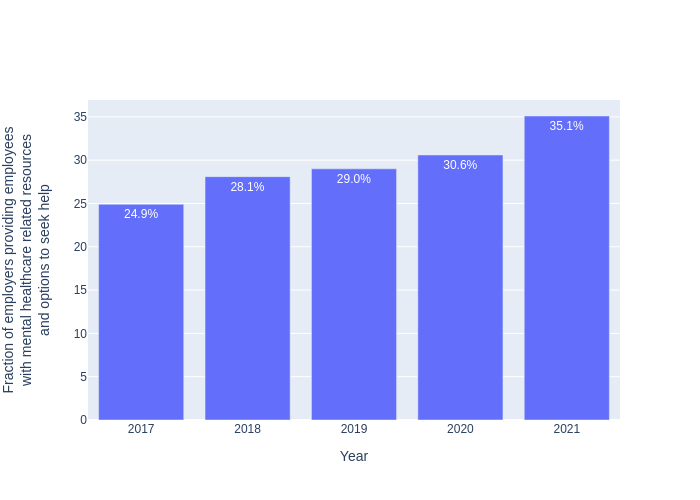

In [20]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=res,text=[str(x)+"%" for x in res]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employers providing employees<br>with mental healthcare related resources<br>and options to seek help')
fig.show("png")

Fraction of employers who have formally discussed mental health

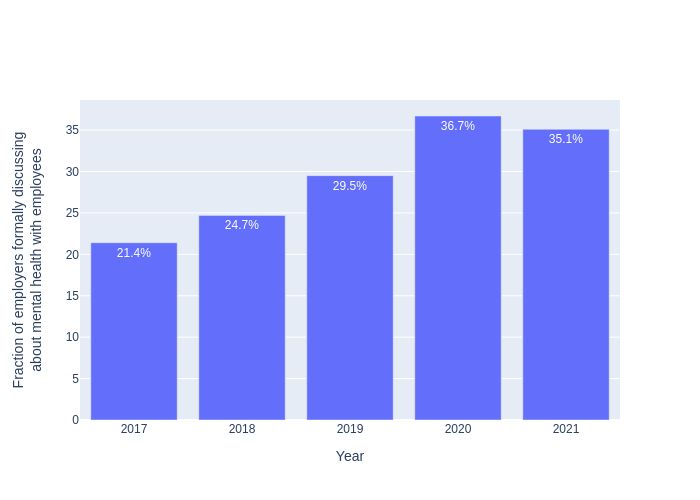

In [21]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=dis_form,text=[str(x)+"%" for x in dis_form]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employers formally discussing<br>about mental health with employees')
fig.show("png")

Fraction of employees who have observed or experienced an unsupportive or badly
handled response to a mental health issue their workplace


In [17]:
unsup17=df17['<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>']
unsup18=df18['<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>']
unsup19=df19['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']
unsup20=df20['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']
unsup21=df21['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']       

print(unsup17.unique())
print(unsup18.unique())
print(unsup19.unique())
print(unsup20.unique())
print(unsup21.unique())

unsup_cnt17=[0 for i in range(3)]
unsup_cnt18=[0 for i in range(3)]
unsup_cnt19=[0 for i in range(3)]
unsup_cnt20=[0 for i in range(3)]
unsup_cnt21=[0 for i in range(3)]

for t in unsup17:
  if(t=='Yes, I experienced'):
    unsup_cnt17[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt17[1]+=1
  elif(t=='No'):
    unsup_cnt17[2]+=1
  

for t in unsup18:
  if(t=='Yes, I experienced'):
    unsup_cnt18[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt18[1]+=1
  elif(t=='No'):
    unsup_cnt18[2]+=1

for t in unsup19:
  if(t=='Yes, I experienced'):
    unsup_cnt19[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt19[1]+=1
  elif(t=='No'):
    unsup_cnt19[2]+=1

for t in unsup20:
  if(t=='Yes, I experienced'):
    unsup_cnt20[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt20[1]+=1
  elif(t=='No'):
    unsup_cnt20[2]+=1

for t in unsup21:
  if(t=='Yes, I experienced'):
    unsup_cnt21[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt21[1]+=1
  elif(t=='No'):
    unsup_cnt21[2]+=1

    unsup_sum17=sum(unsup_cnt17)
unsup_sum18=sum(unsup_cnt18)
unsup_sum19=sum(unsup_cnt19)
unsup_sum20=sum(unsup_cnt20)
unsup_sum21=sum(unsup_cnt21)
# cal %
for i in range(3):
  unsup_cnt17[i]=round((unsup_cnt17[i]/unsup_sum17)*100,1)
  unsup_cnt18[i]=round((unsup_cnt18[i]/unsup_sum18)*100,1)
  unsup_cnt19[i]=round((unsup_cnt19[i]/unsup_sum19)*100,1)
  unsup_cnt20[i]=round((unsup_cnt20[i]/unsup_sum20)*100,1)
  unsup_cnt21[i]=round((unsup_cnt21[i]/unsup_sum21)*100,1)

unsup_exp=[unsup_cnt17[0], unsup_cnt18[0], unsup_cnt19[0], unsup_cnt20[0], unsup_cnt21[0]]
unsup_obs=[unsup_cnt17[1], unsup_cnt18[1], unsup_cnt19[1], unsup_cnt20[1], unsup_cnt21[1]]
unsup_no= [unsup_cnt17[2], unsup_cnt18[2], unsup_cnt19[2], unsup_cnt20[2], unsup_cnt21[2]]
unsup=[unsup_cnt17[0]+unsup_cnt17[1], unsup_cnt18[0]+unsup_cnt18[1], unsup_cnt19[0]+unsup_cnt19[1], unsup_cnt20[0]+unsup_cnt20[1], unsup_cnt21[0]+unsup_cnt21[1]]

unsup=[39.8, 42.6, 46.4, 43.5, 30.8]

['Yes, I experienced' 'Yes, I observed' 'Maybe/Not sure' 'No'
 "I've always been self-employed" nan]
['Yes, I observed' 'No' 'Maybe/Not sure' 'Yes, I experienced'
 "I've always been self-employed"]
['No' 'Yes, I observed' 'Maybe/Not sure' 'Yes, I experienced'
 "I've always been self-employed"]
['Maybe/Not sure' 'Yes, I observed' 'Yes, I experienced' 'No'
 "I've always been self-employed"]
['No' 'Yes, I observed' 'Maybe/Not sure' 'Yes, I experienced'
 "I've always been self-employed"]


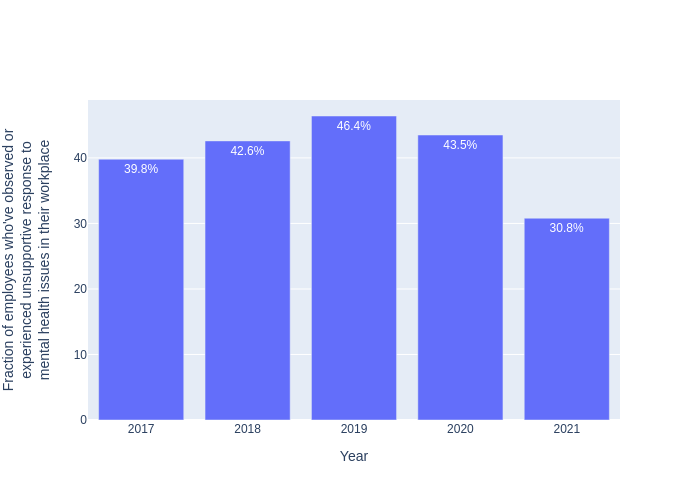

In [18]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=unsup,text=[str(x)+"%" for x in unsup]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced unsupportive response to<br>mental health issues in their workplace ')
fig.show("png")


Fraction of employees who have discussed their mental health with their employer
and/or co-workers

In [15]:
dis_emp17=df17['Have you ever discussed your mental health with your employer?']
dis_emp18=df18['Have you ever discussed your mental health with your employer?']
dis_emp19=df19['Have you ever discussed your mental health with your employer?']
dis_emp20=df20['Have you ever discussed your mental health with your employer?']
dis_emp21=df21['Have you ever discussed your mental health with your employer?']       
dis_cow17=df17['Have you ever discussed your mental health with coworkers?']
dis_cow18=df18['Have you ever discussed your mental health with coworkers?']
dis_cow19=df19['Have you ever discussed your mental health with coworkers?']
dis_cow20=df20['Have you ever discussed your mental health with coworkers?']
dis_cow21=df21['Have you ever discussed your mental health with coworkers?']       


dis_emp_cnt17=round(np.nansum(np.array(dis_emp17))/len(dis_emp17)*100,1)
dis_emp_cnt18=round(np.nansum(np.array(dis_emp18))/len(dis_emp18)*100,1)
dis_emp_cnt19=round(np.nansum(np.array(dis_emp19))/len(dis_emp19)*100,1)
dis_emp_cnt20=round(np.nansum(np.array(dis_emp20))/len(dis_emp20)*100,1)
dis_emp_cnt21=round(np.nansum(np.array(dis_emp21))/len(dis_emp21)*100,1)
dis_cow_cnt17=round(np.nansum(np.array(dis_cow17))/len(dis_cow17)*100,1)
dis_cow_cnt18=round(np.nansum(np.array(dis_cow18))/len(dis_cow18)*100,1)
dis_cow_cnt19=round(np.nansum(np.array(dis_cow19))/len(dis_cow19)*100,1)
dis_cow_cnt20=round(np.nansum(np.array(dis_cow20))/len(dis_cow20)*100,1)
dis_cow_cnt21=round(np.nansum(np.array(dis_cow21))/len(dis_cow21)*100,1)

dis_emp=[dis_emp_cnt17,dis_emp_cnt18,dis_emp_cnt19,dis_emp_cnt20,dis_emp_cnt21]
dis_cow=[dis_cow_cnt17,dis_cow_cnt18,dis_cow_cnt19,dis_cow_cnt20,dis_cow_cnt21]

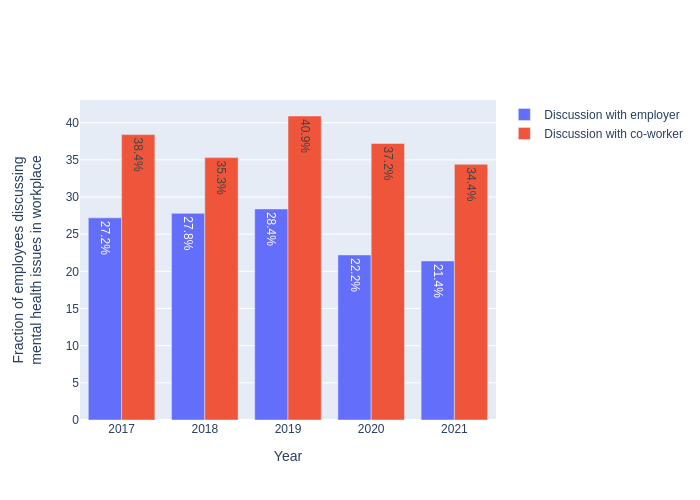

In [16]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Discussion with employer', x=years, y=dis_emp,text=[str(x)+"%" for x in dis_emp]),
    go.Bar(name='Discussion with co-worker', x=years, y=dis_cow,text=[str(x)+"%" for x in dis_cow])])
# Change the bar mode

fig.update_layout(barmode='group', xaxis_title='Year', yaxis_title='Fraction of employees discussing<br>mental health issues in workplace')
fig.show("png")

Fraction of employees who feel that requesting a medical leave from work due to
a mental health issue is easy

In [12]:
leave17=df17['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave18=df18['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave19=df19['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave20=df20['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave21=df21['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']

lv_cnt17=[0 for i in range(6)]
lv_cnt18=[0 for i in range(6)]
lv_cnt19=[0 for i in range(6)]
lv_cnt20=[0 for i in range(6)]
lv_cnt21=[0 for i in range(6)]


for t in leave17:
  if(t=='Very easy'):
    lv_cnt17[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt17[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt17[2]+=1
  elif(t=="I don't know"):
    lv_cnt17[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt17[4]+=1 
  elif(t=='Difficult'):
    lv_cnt17[5]+=1 

for t in leave18:
  if(t=='Very easy'):
    lv_cnt18[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt18[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt18[2]+=1
  elif(t=="I don't know"):
    lv_cnt18[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt18[4]+=1 
  elif(t=='Difficult'):
    lv_cnt18[5]+=1 

for t in leave19:
  if(t=='Very easy'):
    lv_cnt19[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt19[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt19[2]+=1
  elif(t=="I don't know"):
    lv_cnt19[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt19[4]+=1 
  elif(t=='Difficult'):
    lv_cnt19[5]+=1 

for t in leave20:
  if(t=='Very easy'):
    lv_cnt20[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt20[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt20[2]+=1
  elif(t=="I don't know"):
    lv_cnt20[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt20[4]+=1 
  elif(t=='Difficult'):
    lv_cnt20[5]+=1 

for t in leave21:
  if(t=='Very easy'):
    lv_cnt21[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt21[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt21[2]+=1
  elif(t=="I don't know"):
    lv_cnt21[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt21[4]+=1 
  elif(t=='Difficult'):
    lv_cnt21[5]+=1 

lv_sum17=sum(lv_cnt17)
lv_sum18=sum(lv_cnt18)
lv_sum19=sum(lv_cnt19)
lv_sum20=sum(lv_cnt20)
lv_sum21=sum(lv_cnt21)

# cal %
for i in range(6):
  lv_cnt17[i]=round((lv_cnt17[i]/lv_sum17)*100,1)
  lv_cnt18[i]=round((lv_cnt18[i]/lv_sum18)*100,1)
  lv_cnt19[i]=round((lv_cnt19[i]/lv_sum19)*100,1)
  lv_cnt20[i]=round((lv_cnt20[i]/lv_sum20)*100,1)
  lv_cnt21[i]=round((lv_cnt21[i]/lv_sum21)*100,1)

In [13]:
leave_ease=[lv_cnt17[0], lv_cnt18[0], lv_cnt19[0], lv_cnt20[0], lv_cnt21[0]]
leave_diff=[lv_cnt17[5], lv_cnt18[5], lv_cnt19[5], lv_cnt20[5], lv_cnt21[5]]
leave_som_wat_diff=[lv_cnt17[4], lv_cnt18[4], lv_cnt19[4], lv_cnt20[4], lv_cnt21[4]]
leave_som_wat_ease=[lv_cnt17[1], lv_cnt18[1], lv_cnt19[1], lv_cnt20[1], lv_cnt21[1]]
leave_df=[lv_cnt17[5]+lv_cnt17[4], lv_cnt18[5]+lv_cnt18[5], lv_cnt19[5]+lv_cnt19[4], lv_cnt20[5]+lv_cnt20[4], lv_cnt21[5]+lv_cnt21[4]]
leave_es=[lv_cnt17[0]+lv_cnt17[1], lv_cnt18[0]+lv_cnt18[1], lv_cnt19[0]+lv_cnt19[1], lv_cnt20[0]+lv_cnt20[1], lv_cnt21[0]+lv_cnt21[1]]
years = ['2017', '2018', '2019', '2020', '2021']

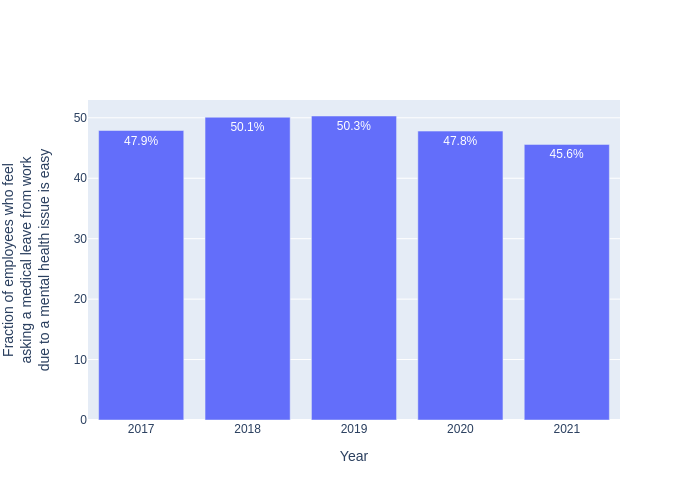

In [14]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=leave_es,text=[str(round(x,1))+"%" for x in leave_es]))
fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who feel<br>asking a medical leave from work<br>due to a mental health issue is easy')
fig.show("png")

Employees’ rating (1-10) on the importance placed by their employers on physical
and mental health

In [ ]:
imp_ph17=df17['Overall, how much importance does your employer place on physical health?']
imp_ph18=df18['Overall, how much importance does your employer place on physical health?']
imp_ph19=df19['Overall, how much importance does your employer place on physical health?']
imp_ph20=df20['Overall, how much importance does your employer place on physical health?']
imp_ph21=df21['Overall, how much importance does your employer place on physical health?']       


imp_mh17=df17['Overall, how much importance does your employer place on mental health?']
imp_mh18=df18['Overall, how much importance does your employer place on mental health?']
imp_mh19=df19['Overall, how much importance does your employer place on mental health?']
imp_mh20=df20['Overall, how much importance does your employer place on mental health?']
imp_mh21=df21['Overall, how much importance does your employer place on mental health?']       


imp_ph_avg17 = round(np.nanmean(np.array(imp_ph17)),1)
imp_ph_avg18=round(np.nanmean(np.array(imp_ph18)),1)
imp_ph_avg19=round(np.nanmean(np.array(imp_ph19)),1)
imp_ph_avg20=round(np.nanmean(np.array(imp_ph20)),1)
imp_ph_avg21=round(np.nanmean(np.array(imp_ph21)),1)
imp_mh_avg17=round(np.nanmean(np.array(imp_mh17)),1)
imp_mh_avg18=round(np.nanmean(np.array(imp_mh18)),1)
imp_mh_avg19=round(np.nanmean(np.array(imp_mh19)),1)
imp_mh_avg20=round(np.nanmean(np.array(imp_mh20)),1)
imp_mh_avg21=round(np.nanmean(np.array(imp_mh21)),1)


imp_ph_data= [imp_ph_avg17, imp_ph_avg18, imp_ph_avg19, imp_ph_avg20, imp_ph_avg21]
imp_mh_data= [imp_mh_avg17, imp_mh_avg18, imp_mh_avg19, imp_mh_avg20, imp_mh_avg21]

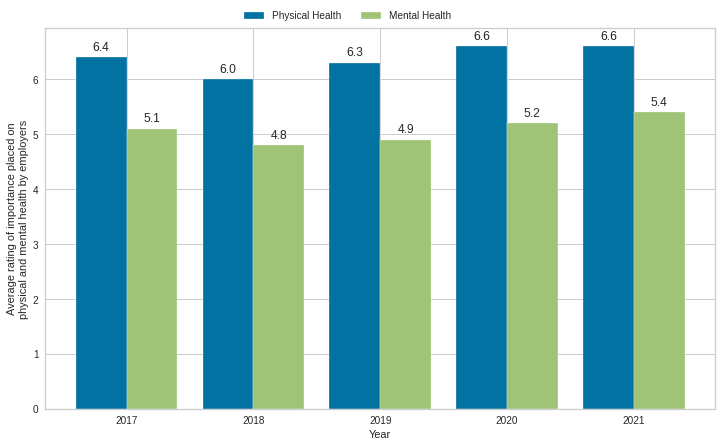

In [ ]:
width = 0.40
years = ['2017', '2018', '2019', '2020', '2021']
x = np.arange(5)  
# plot data in grouped manner of bar type
fig, ax = plt.subplots(figsize=(12,7))
ph=plt.bar(x-0.2, imp_ph_data, width)
mh=plt.bar(x+0.2, imp_mh_data, width)
plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("Average rating of importance placed on\nphysical and mental health by employers")
plt.legend(["Physical Health", "Mental Health"],bbox_to_anchor =(0.62, 1.07), ncol = 2)
for p in ax.patches:
    ax.annotate(s=np.round(p.get_height(), decimals=2),xy=(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.savefig('imp_ph_mh1.jpg')
plt.show()

Fraction of employees who have observed or experienced a supportive or well-
handled response to a mental health issue their workplace

In [9]:
sup17=df17['<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>']
sup18=df18['<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>']
sup19=df19['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']
sup20=df20['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']
sup21=df21['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']       

sup_cnt17=[0 for i in range(3)]
sup_cnt18=[0 for i in range(3)]
sup_cnt19=[0 for i in range(3)]
sup_cnt20=[0 for i in range(3)]
sup_cnt21=[0 for i in range(3)]

for t in sup17:
  if(t=='Yes, I experienced'):
    sup_cnt17[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt17[1]+=1
  elif(t=='No'):
    sup_cnt17[2]+=1
  

for t in sup18:
  if(t=='Yes, I experienced'):
    sup_cnt18[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt18[1]+=1
  elif(t=='No'):
    sup_cnt18[2]+=1

for t in sup19:
  if(t=='Yes, I experienced'):
    sup_cnt19[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt19[1]+=1
  elif(t=='No'):
    sup_cnt19[2]+=1

for t in sup20:
  if(t=='Yes, I experienced'):
    sup_cnt20[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt20[1]+=1
  elif(t=='No'):
    sup_cnt20[2]+=1

for t in sup21:
  if(t=='Yes, I experienced'):
    sup_cnt21[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt21[1]+=1
  elif(t=='No'):
    sup_cnt21[2]+=1

sup_sum17=sum(sup_cnt17)
sup_sum18=sum(sup_cnt18)
sup_sum19=sum(sup_cnt19)
sup_sum20=sum(sup_cnt20)
sup_sum21=sum(sup_cnt21)
# cal %
for i in range(3):
  sup_cnt17[i]=round((sup_cnt17[i]/sup_sum17)*100,1)
  sup_cnt18[i]=round((sup_cnt18[i]/sup_sum18)*100,1)
  sup_cnt19[i]=round((sup_cnt19[i]/sup_sum19)*100,1)
  sup_cnt20[i]=round((sup_cnt20[i]/sup_sum20)*100,1)
  sup_cnt21[i]=round((sup_cnt21[i]/sup_sum21)*100,1)

sup_exp=[sup_cnt17[0], sup_cnt18[0], sup_cnt19[0], sup_cnt20[0], sup_cnt21[0]]
sup_obs=[sup_cnt17[1], sup_cnt18[1], sup_cnt19[1], sup_cnt20[1], sup_cnt21[1]]
sup=[sup_cnt17[0]+sup_cnt17[1], sup_cnt18[0]+sup_cnt18[1], sup_cnt19[0]+sup_cnt19[1], sup_cnt20[0]+sup_cnt20[1], sup_cnt21[0]+sup_cnt21[1]]
sup_no= [sup_cnt17[2], sup_cnt18[2], sup_cnt19[2], sup_cnt20[2], sup_cnt21[2]]

In [10]:
sup_data= np.array([sup_cnt17, sup_cnt18, sup_cnt19, sup_cnt20, sup_cnt21]).T
sup_data_list=sup_data.tolist()

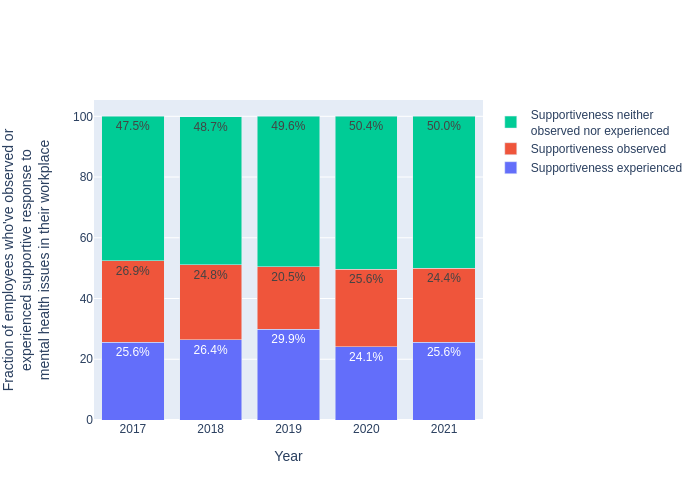

In [11]:
import plotly.graph_objects as go
x = ['2017', '2018', '2019', '2020', '2021']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=sup_data_list[0], name='Supportiveness experienced',text=[str(x)+"%" for x in sup_data_list[0]]))
fig.add_trace(go.Bar(x=x, y=sup_data_list[1],name='Supportiveness observed',text=[str(x)+"%"  for x in sup_data_list[1]]))
fig.add_trace(go.Bar(x=x, y=sup_data_list[2],name='Supportiveness neither<br>observed nor experienced',text=[str(x)+"%"  for x in sup_data_list[2]]))

fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced supportive response to<br>mental health issues in their workplace ')
fig.show("png")


Employees’ rating (scale 1-5) of tech industry’s support for employees with mental
health issues

In [4]:
tech_sup17=df17['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup18=df18['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup19=df19['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup20=df20['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup21=df21['Overall, how well do you think the tech industry supports employees with mental health issues?']
          
aavg17= np.nanmean(np.array(tech_sup17))
aavg18= np.nanmean(np.array(tech_sup18))
aavg19= np.nanmean(np.array(tech_sup19))
aavg20=np.nanmean(np.array(tech_sup20))
aavg21= np.nanmean(np.array(tech_sup21))
cnt17=[0 for i in range(5)]
cnt18=[0 for i in range(5)]
cnt19=[0 for i in range(5)]
cnt20=[0 for i in range(5)]
cnt21=[0 for i in range(5)]

for t in tech_sup17:
  if(t==1):
    cnt17[0] = cnt17[0] + 1
  elif(t==2):
    cnt17[1]=cnt17[1]+1
  elif(t==3):
    cnt17[2]=cnt17[2]+1
  elif(t==4):
    cnt17[3]=cnt17[3]+1
  elif(t==5):
    cnt17[4]=cnt17[4]+1 
for t in tech_sup18:
  if(t==1):
    cnt18[0] = cnt18[0] + 1
  elif(t==2):
    cnt18[1]=cnt18[1]+1
  elif(t==3):
    cnt18[2]=cnt18[2]+1
  elif(t==4):
    cnt18[3]=cnt18[3]+1
  elif(t==5):
    cnt18[4]=cnt18[4]+1 
for t in tech_sup19:
  if(t==1):
    cnt19[0] = cnt19[0] + 1
  elif(t==2):
    cnt19[1]=cnt19[1]+1
  elif(t==3):
    cnt19[2]=cnt19[2]+1
  elif(t==4):
    cnt19[3]=cnt19[3]+1
  elif(t==5):
    cnt19[4]=cnt19[4]+1 
for t in tech_sup20:
  if(t==1):
    cnt20[0] = cnt20[0] + 1
  elif(t==2):
    cnt20[1]=cnt20[1]+1
  elif(t==3):
    cnt20[2]=cnt20[2]+1
  elif(t==4):
    cnt20[3]=cnt20[3]+1
  elif(t==5):
    cnt20[4]=cnt20[4]+1 
for t in tech_sup21:
  if(t==1):
    cnt21[0] = cnt21[0] + 1
  elif(t==2):
    cnt21[1]=cnt21[1]+1
  elif(t==3):
    cnt21[2]=cnt21[2]+1
  elif(t==4):
    cnt21[3]=cnt21[3]+1
  elif(t==5):
    cnt21[4]=cnt21[4]+1 

sum17=sum(cnt17)
sum18=sum(cnt18)
sum19=sum(cnt19)
sum20=sum(cnt20)
sum21=sum(cnt21)
for i in range(5):
  cnt17[i]=round((cnt17[i]/sum17)*100,1)
  cnt18[i]=round((cnt18[i]/sum18)*100,1)
  cnt19[i]=round((cnt19[i]/sum19)*100,1)
  cnt20[i]=round((cnt20[i]/sum20)*100,1)
  cnt21[i]=round((cnt21[i]/sum21)*100,1)

In [5]:
Rating=['1', '2', '3', '4', '5']
rate_data= np.array([cnt17, cnt18, cnt19, cnt20, cnt21]).T
rate_data_list=rate_data.tolist()

In [187]:
!pip install kaleido
import kaleido #required
kaleido.__version__ #0.2.1

import plotly
plotly.__version__ #5.5.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'5.5.0'

In [ ]:
# pip install plotly==5.3.1

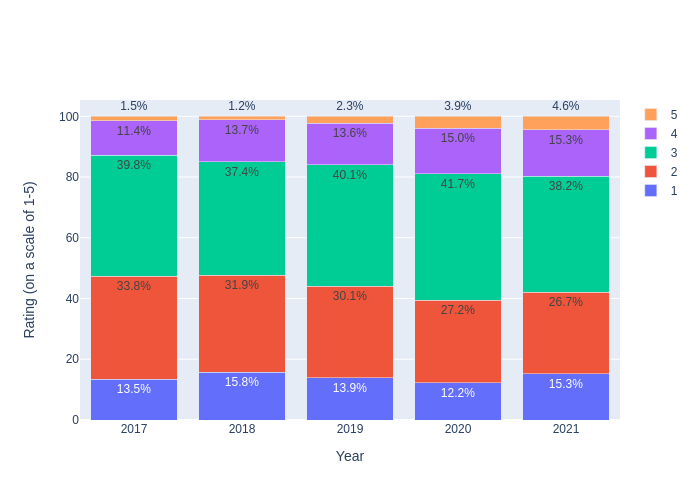

In [8]:
# import plotly
# import kaleido
import plotly.graph_objects as go
x = ['2017', '2018', '2019', '2020', '2021']
p="%"
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=rate_data_list[0], name='1',text=[str(x)+"%" for x in rate_data_list[0]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[1],name='2',text=[str(x)+"%"  for x in rate_data_list[1]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[2],name='3',text=[str(x)+"%"  for x in rate_data_list[2]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[3],name='4',text=[str(x)+"%"  for x in rate_data_list[3]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[4],name='5',text=[str(x)+"%"  for x in rate_data_list[4]]))
fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Rating (on a scale of 1-5)')
fig.show("png")